# Análisis Exploratorio de Datos (EDA) para el Dataset de Calificaciones

## Introducción
El propósito de este análisis es explorar el dataset de calificaciones y obtener una comprensión profunda de las relaciones entre las variables, identificar patrones y posibles valores atípicos, y preparar los datos para futuros modelos predictivos. En este informe, se incluyen análisis bivariados, ANOVA y métricas de asociación, tales como el cálculo de **Cramér's V**.


In [1]:
import sys
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()

current_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.abspath(os.path.join(current_dir, '..', '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from scripts.eda_notes_analyzer import EDANotesAnalyzer

## 2.1. Carga de dataset de Calificaciones limpio

Cargar la fuente de datos procesada con limpieza aplicada a las calificaciones y agregar columna de riesgo

In [2]:
df_limpio = pd.read_csv("../../data/processed/data_clean_notes_2023_2024_2025.csv")

df_limpio['Grado'] = df_limpio['Grado'].astype(object)
df_limpio['Periodo'] = df_limpio['Periodo'].astype(object)
df_limpio['Año'] = df_limpio['Año'].astype(object)
df_limpio.info()
df_limpio.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32681 entries, 0 to 32680
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sede                32681 non-null  object
 1   Estudiante          32681 non-null  object
 2   Grado               32681 non-null  object
 3   Grupo               32681 non-null  object
 4   Periodo             32681 non-null  object
 5   Año                 32681 non-null  object
 6   Intensidad_Horaria  32681 non-null  int64 
 7   Asignatura          32681 non-null  object
 8   Cognitiva           32681 non-null  int64 
 9   Procedimental       32681 non-null  int64 
 10  Actitudinal         32681 non-null  int64 
 11  Axiologica          32681 non-null  int64 
 12  Docente             32681 non-null  object
 13  Resultado           32681 non-null  int64 
 14  Nivel               32681 non-null  object
 15  Identificacion      32681 non-null  object
dtypes: int64(6), object(10

Intensidad_Horaria     Cognitiva  Procedimental   Actitudinal  \
count        32681.000000  32681.000000    32681.00000  32681.000000   
mean             2.734647     83.997827       83.74655     88.142835   
std              1.503778      9.672838       10.10207      9.087557   
min              1.000000      7.000000        7.00000      0.000000   
25%              1.000000     79.000000       79.00000     85.000000   
50%              3.000000     86.000000       86.00000     90.000000   
75%              4.000000     91.000000       91.00000     95.000000   
max              7.000000    100.000000      100.00000    100.000000   

         Axiologica     Resultado  
count  32681.000000  32681.000000  
mean      89.805147     85.429271  
std        8.445080      8.291707  
min        0.000000      5.000000  
25%       86.000000     81.000000  
50%       90.000000     87.000000  
75%       95.000000     91.000000  
max      100.000000    100.000000

In [3]:
eda = EDANotesAnalyzer(df_limpio)

In [4]:
# Crear variable de riesgo
df_riesgo = eda.create_risk_variable(threshold=80)
df_riesgo[['Estudiante', 'Resultado', 'En_Riesgo']].head()
df_riesgo.to_csv("../../data/processed/data_clean_notes_2023_2024_2025_riesgo.csv", index=False)

## 2.2. Analisis parcial de variables relevantes  
- promedio de estudiantes  
- verificar si todos los estudiantes estan en todos los periodos  
- Graficar histograma por estudiante


In [5]:
#  Promedio por estudiante
promedio_por_estudiante=eda.promedio_por_estudiante()
print(promedio_por_estudiante.head(10))

                                          Estudiante  Periodo   Año  Resultado
0  000000b08384e8448524db481342db0d3b454fd3901036...        1  2025  86.666667
1  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        1  2023  87.000000
2  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        1  2024  91.083333
3  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        2  2023  90.250000
4  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        2  2024  91.166667
5  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        3  2023  89.916667
6  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        3  2024  90.916667
7  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        4  2023  90.666667
8  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        4  2024  90.166667
9  0040d267edc503ad5cec5d1d05a930e8ebdd1c0e73298b...        1  2023  93.333333


In [6]:
# Verificar si todos los estudiantes tienen todos los periodos
verificar_periodos_completos=eda.verificar_periodos_completos()
print(verificar_periodos_completos.head(20))

                                           Estudiante   Año  \
0   000000b08384e8448524db481342db0d3b454fd3901036...  2025   
8   007c9576b1d5462ba014bf28f52e47975aafba7e23c722...  2025   
14  01c684403f88fff69a4f08efa41ba586ab2b48d439f77e...  2025   
15  02739ac024d11820be388248649a77b1ce7f4539b1ba0c...  2025   
18  02f973a636937d7f3d567ebb49ebf963f74683156d2c99...  2025   
19  0371ce717b6dedee1b47bb63bc9b2193023101cebea4a1...  2025   
22  03a24538dc859c3270e7b56a00bd6581de54e49e1aa89b...  2025   
24  041b5595924486f4bfca7e3a06383302bfb499a2a1feef...  2025   
25  04e265f2cbd7025a39f2695725c8e9fd60c3a6395d78c7...  2025   
27  0521814a3853c48741d502f35fda7667515cf006e2a1fd...  2025   
29  05f9f6faaf2ff9b6b5fc9f35eab73dd956393ebe87a280...  2025   
31  076479825fbcc2a08ad6004573f818018e72b771b56e71...  2024   
34  0783a02beab5c2313526e4cb8827d303383f1ee5f99ceb...  2025   
38  08ab0a29f140a4f6bd69ae927c3b0afce186253d9dc817...  2025   
40  08f008a4176bc0907f0173bec529d5368ca41b21222820...  

c:\Users\Cathe\Documents\MAA\GIT-REPOS\formar-innovar\scripts\eda_notes_analyzer.py:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Asignatura', loc='upper right', bbox_to_anchor=(1, 1), fontsize='small')
c:\Users\Cathe\Documents\MAA\GIT-REPOS\formar-innovar\scripts\eda_notes_analyzer.py:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Asignatura', loc='upper right', bbox_to_anchor=(1, 1), fontsize='small')
c:\Users\Cathe\Documents\MAA\GIT-REPOS\formar-innovar\scripts\eda_notes_analyzer.py:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Asignatura', loc='upper

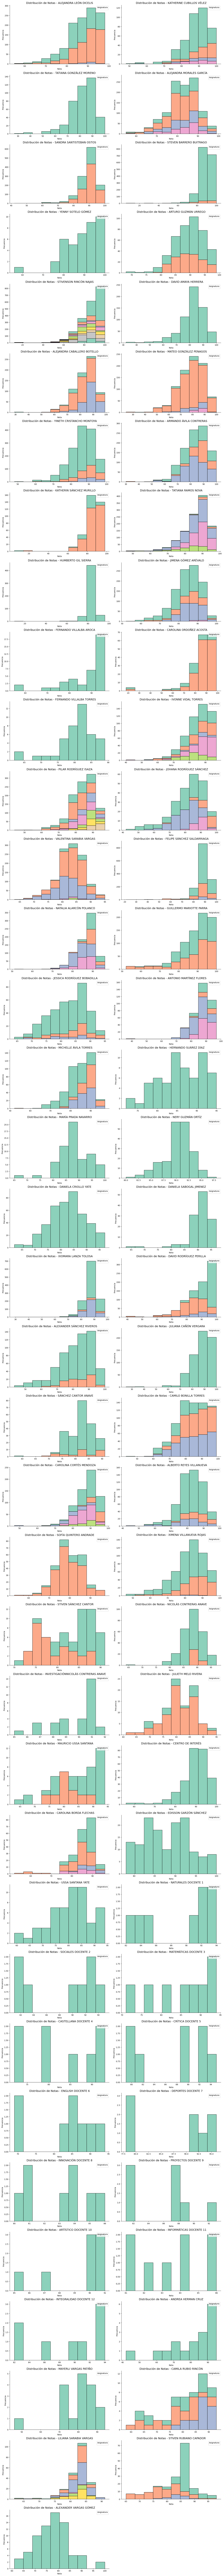

In [7]:
# 8. Histogramas por docente
eda.plot_histograma_por_docente_asignatura()

## 2.3. Analisis bivariado  
- Analisis entre variables numericas  
- Analisis entre variables categoricas  
- Analisis entre variables numericas / categoricas  
- Analisis de Varianza con ANOVA  

Nota: todos los resultados seran expotados


1. Análisis Bivariado: Variables Numéricas vs Numéricas
Para investigar las relaciones entre dos variables numéricas, se realiza un gráfico de dispersión y se calculan las correlaciones.


Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32681.000000
mean         2.734647
std          1.503778
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64

Estadísticas descriptivas de la columna 'Cognitiva':
count    32681.000000
mean        83.997827
std          9.672838
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cognitiva, dtype: float64


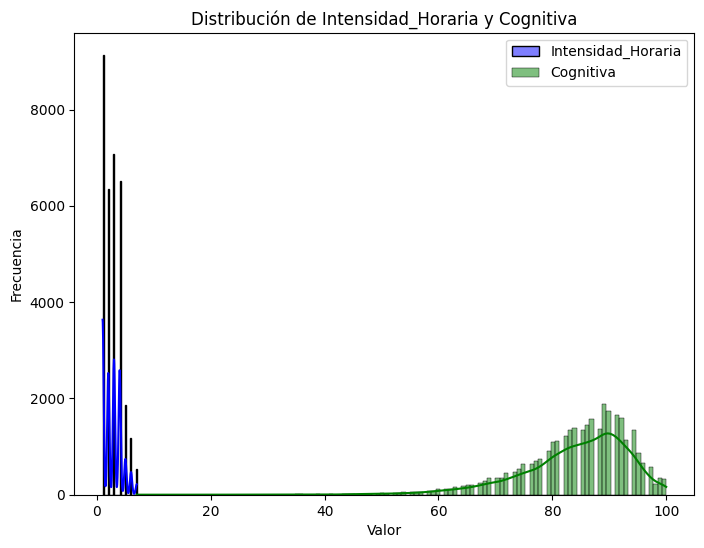

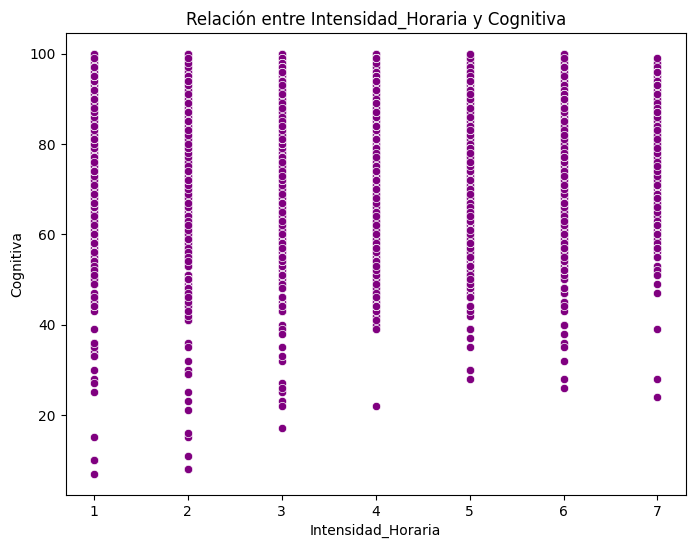

- Coeficiente de correlación de Pearson entre Intensidad_Horaria y Cognitiva: -0.32
- Coeficiente de correlación de Spearman entre Intensidad_Horaria y Cognitiva: -0.33

Resumen de los resultados:
            Columna 1  Columna 2  Coef. Pearson  Coef. Spearman
0  Intensidad_Horaria  Cognitiva      -0.320435       -0.334431

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32681.000000
mean         2.734647
std          1.503778
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64

Estadísticas descriptivas de la columna 'Procedimental':
count    32681.00000
mean        83.74655
std         10.10207
min          7.00000
25%         79.00000
50%         86.00000
75%         91.00000
max        100.00000
Name: Procedimental, dtype: float64


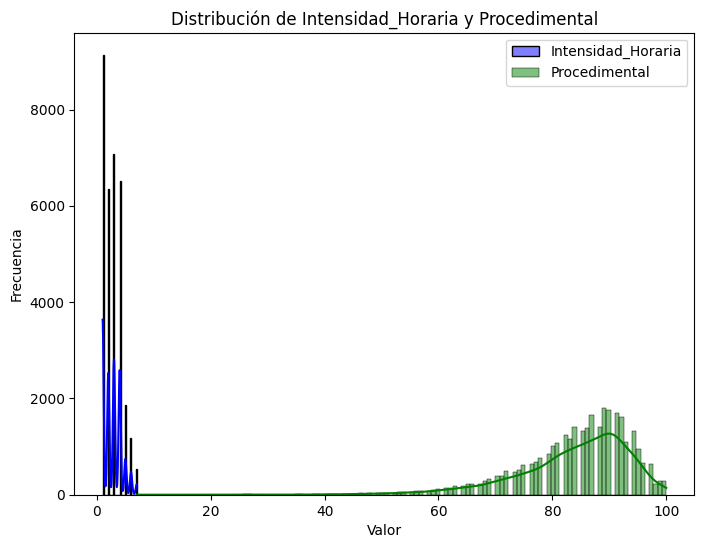

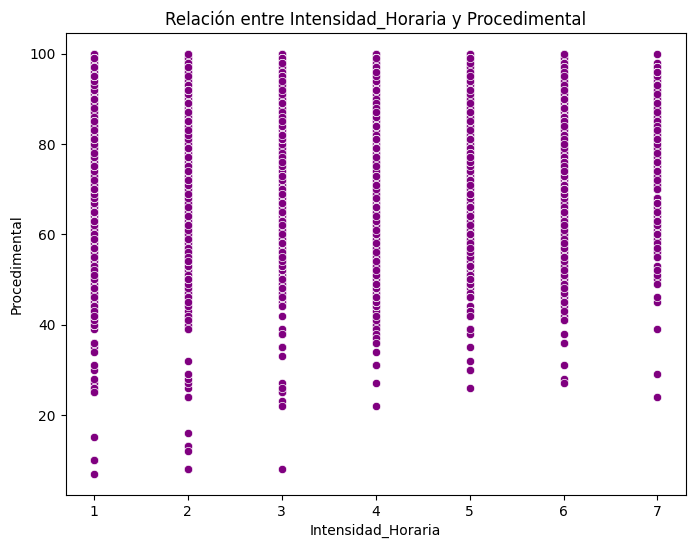

- Coeficiente de correlación de Pearson entre Intensidad_Horaria y Procedimental: -0.29
- Coeficiente de correlación de Spearman entre Intensidad_Horaria y Procedimental: -0.31

Resumen de los resultados:
            Columna 1      Columna 2  Coef. Pearson  Coef. Spearman
0  Intensidad_Horaria  Procedimental      -0.286485       -0.313118

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32681.000000
mean         2.734647
std          1.503778
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64

Estadísticas descriptivas de la columna 'Actitudinal':
count    32681.000000
mean        88.142835
std          9.087557
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Actitudinal, dtype: float64


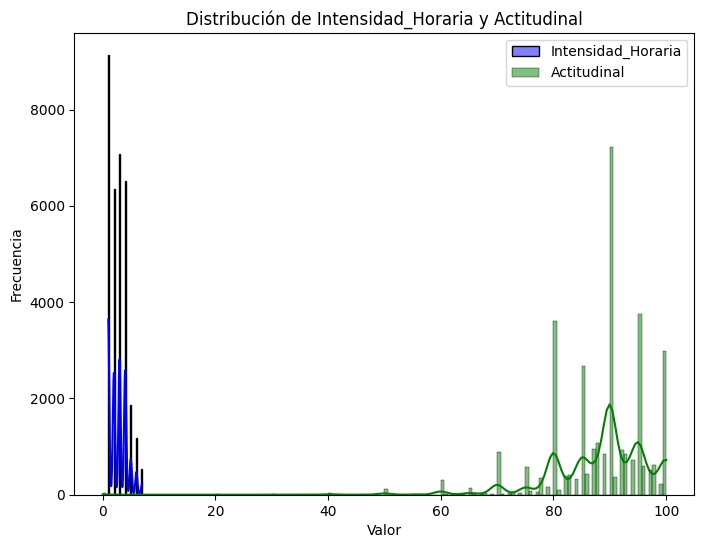

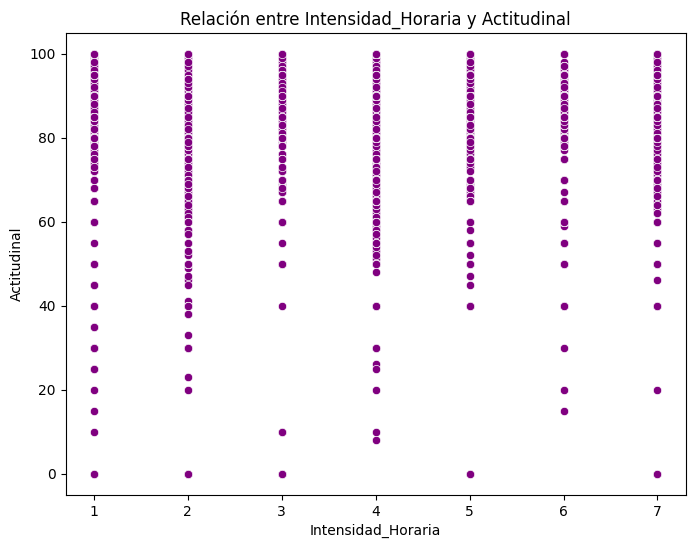

- Coeficiente de correlación de Pearson entre Intensidad_Horaria y Actitudinal: -0.03
- Coeficiente de correlación de Spearman entre Intensidad_Horaria y Actitudinal: -0.01

Resumen de los resultados:
            Columna 1    Columna 2  Coef. Pearson  Coef. Spearman
0  Intensidad_Horaria  Actitudinal      -0.032632        -0.01499

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32681.000000
mean         2.734647
std          1.503778
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64

Estadísticas descriptivas de la columna 'Axiologica':
count    32681.000000
mean        89.805147
std          8.445080
min          0.000000
25%         86.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axiologica, dtype: float64


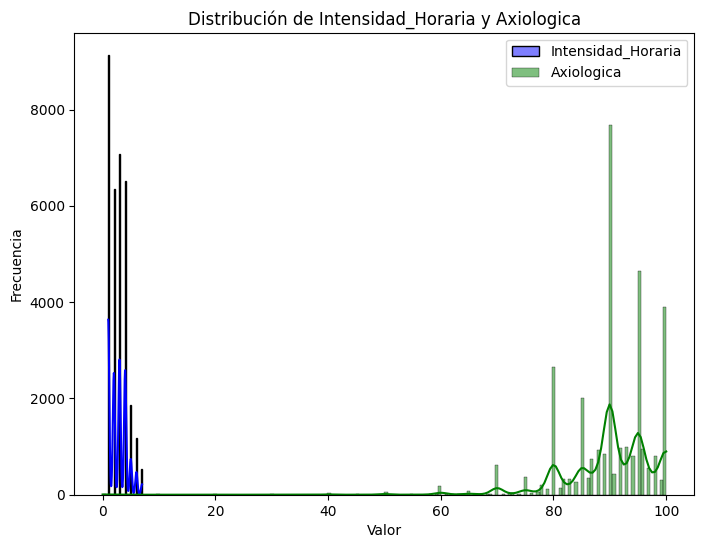

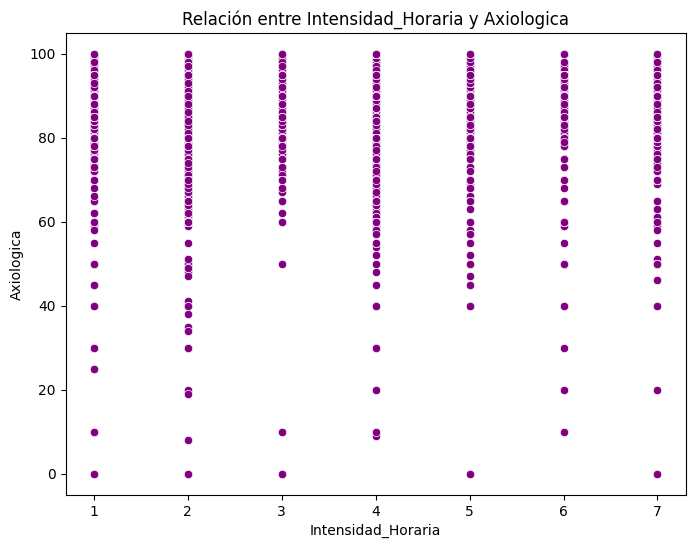

- Coeficiente de correlación de Pearson entre Intensidad_Horaria y Axiologica: -0.02
- Coeficiente de correlación de Spearman entre Intensidad_Horaria y Axiologica: 0.00

Resumen de los resultados:
            Columna 1   Columna 2  Coef. Pearson  Coef. Spearman
0  Intensidad_Horaria  Axiologica      -0.021483        0.004917

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32681.000000
mean         2.734647
std          1.503778
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64

Estadísticas descriptivas de la columna 'Resultado':
count    32681.000000
mean        85.429271
std          8.291707
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64


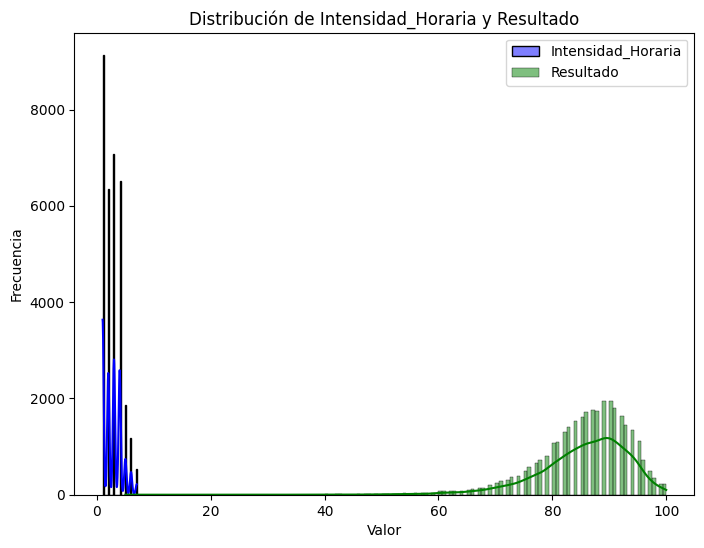

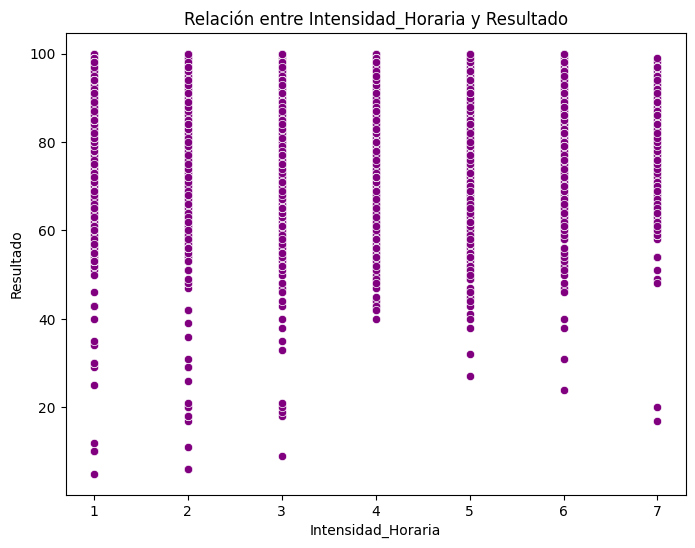

- Coeficiente de correlación de Pearson entre Intensidad_Horaria y Resultado: -0.25
- Coeficiente de correlación de Spearman entre Intensidad_Horaria y Resultado: -0.27

Resumen de los resultados:
            Columna 1  Columna 2  Coef. Pearson  Coef. Spearman
0  Intensidad_Horaria  Resultado      -0.254367       -0.272458

Estadísticas descriptivas de la columna 'Cognitiva':
count    32681.000000
mean        83.997827
std          9.672838
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cognitiva, dtype: float64

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32681.000000
mean         2.734647
std          1.503778
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64


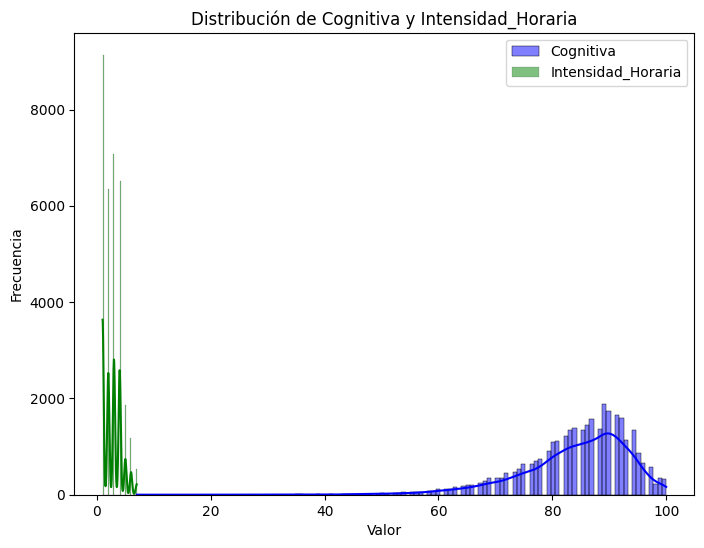

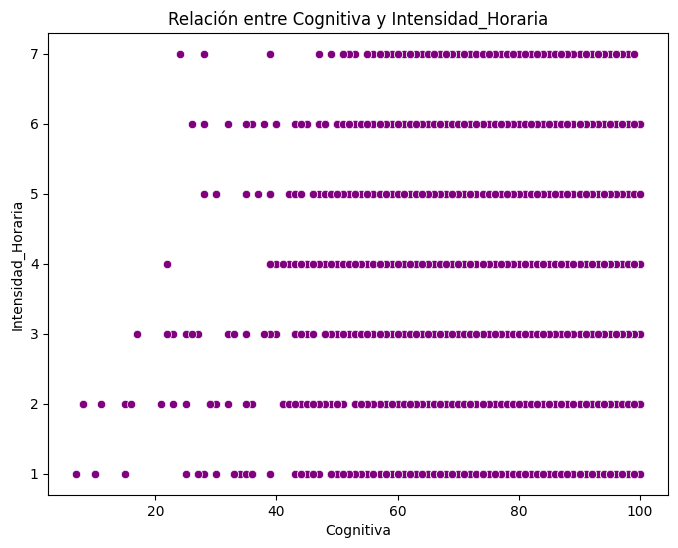

- Coeficiente de correlación de Pearson entre Cognitiva y Intensidad_Horaria: -0.32
- Coeficiente de correlación de Spearman entre Cognitiva y Intensidad_Horaria: -0.33

Resumen de los resultados:
   Columna 1           Columna 2  Coef. Pearson  Coef. Spearman
0  Cognitiva  Intensidad_Horaria      -0.320435       -0.334431

Estadísticas descriptivas de la columna 'Cognitiva':
count    32681.000000
mean        83.997827
std          9.672838
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cognitiva, dtype: float64

Estadísticas descriptivas de la columna 'Procedimental':
count    32681.00000
mean        83.74655
std         10.10207
min          7.00000
25%         79.00000
50%         86.00000
75%         91.00000
max        100.00000
Name: Procedimental, dtype: float64


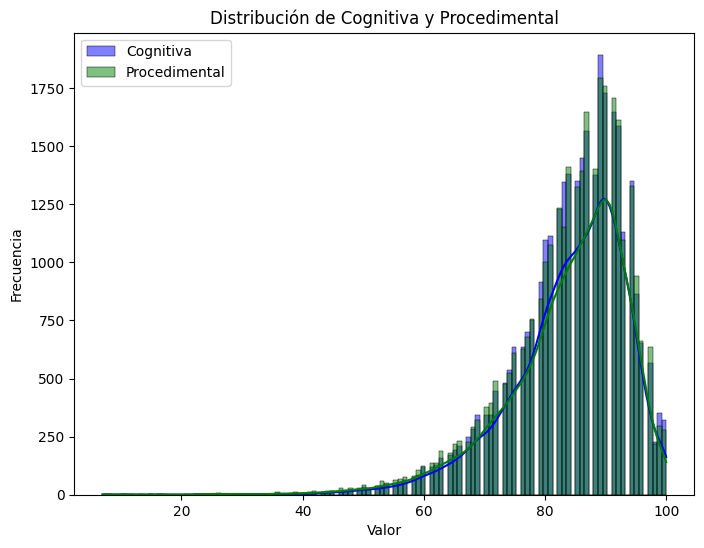

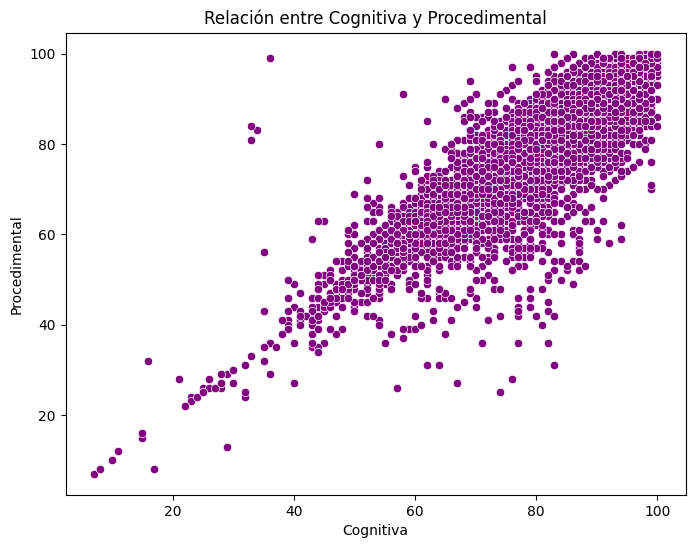

- Coeficiente de correlación de Pearson entre Cognitiva y Procedimental: 0.93
- Coeficiente de correlación de Spearman entre Cognitiva y Procedimental: 0.93

Resumen de los resultados:
   Columna 1      Columna 2  Coef. Pearson  Coef. Spearman
0  Cognitiva  Procedimental       0.928526        0.930244

Estadísticas descriptivas de la columna 'Cognitiva':
count    32681.000000
mean        83.997827
std          9.672838
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cognitiva, dtype: float64

Estadísticas descriptivas de la columna 'Actitudinal':
count    32681.000000
mean        88.142835
std          9.087557
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Actitudinal, dtype: float64


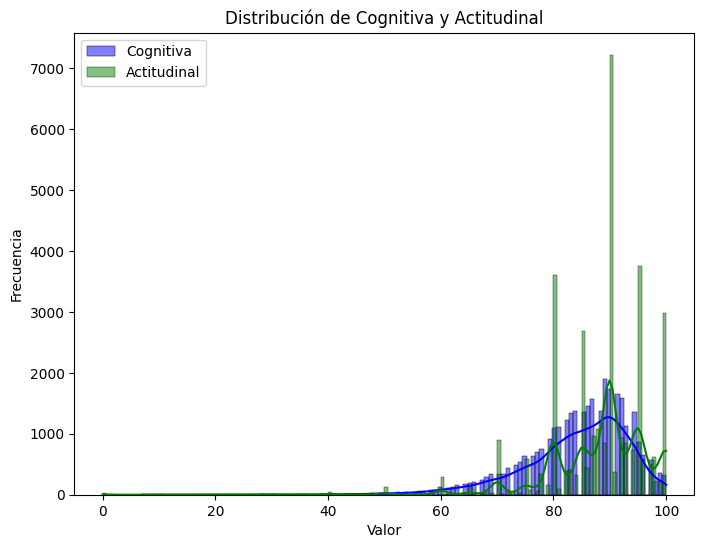

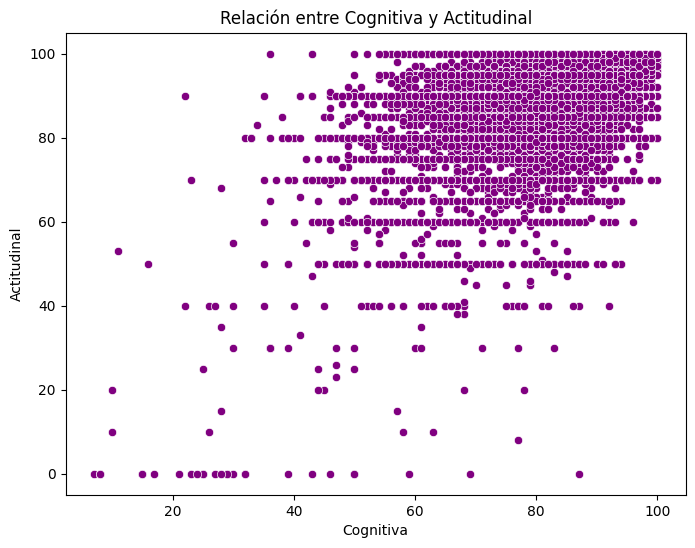

- Coeficiente de correlación de Pearson entre Cognitiva y Actitudinal: 0.51
- Coeficiente de correlación de Spearman entre Cognitiva y Actitudinal: 0.49

Resumen de los resultados:
   Columna 1    Columna 2  Coef. Pearson  Coef. Spearman
0  Cognitiva  Actitudinal       0.513691        0.494638

Estadísticas descriptivas de la columna 'Cognitiva':
count    32681.000000
mean        83.997827
std          9.672838
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cognitiva, dtype: float64

Estadísticas descriptivas de la columna 'Axiologica':
count    32681.000000
mean        89.805147
std          8.445080
min          0.000000
25%         86.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axiologica, dtype: float64


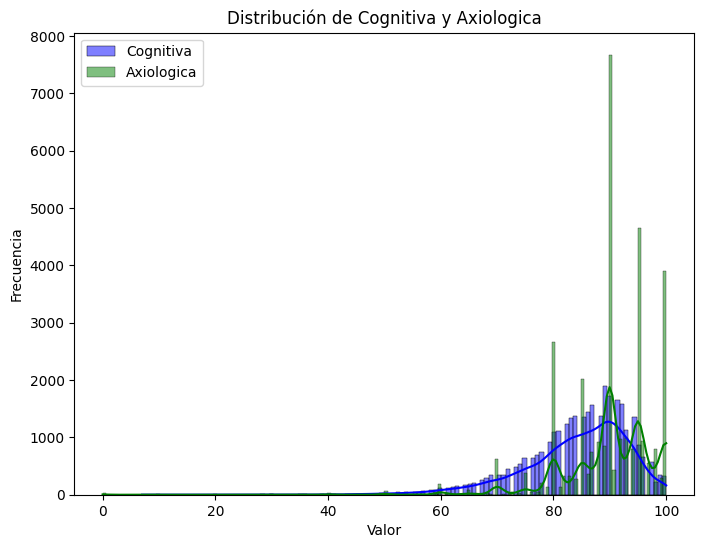

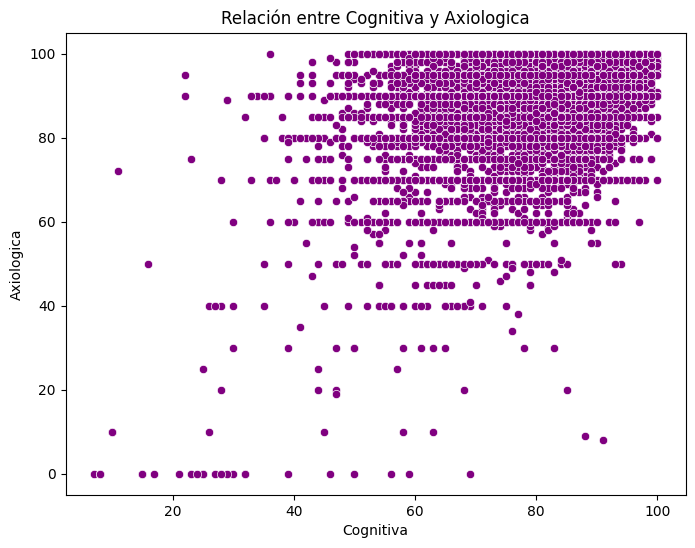

- Coeficiente de correlación de Pearson entre Cognitiva y Axiologica: 0.43
- Coeficiente de correlación de Spearman entre Cognitiva y Axiologica: 0.38

Resumen de los resultados:
   Columna 1   Columna 2  Coef. Pearson  Coef. Spearman
0  Cognitiva  Axiologica       0.427379        0.383865

Estadísticas descriptivas de la columna 'Cognitiva':
count    32681.000000
mean        83.997827
std          9.672838
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cognitiva, dtype: float64

Estadísticas descriptivas de la columna 'Resultado':
count    32681.000000
mean        85.429271
std          8.291707
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64


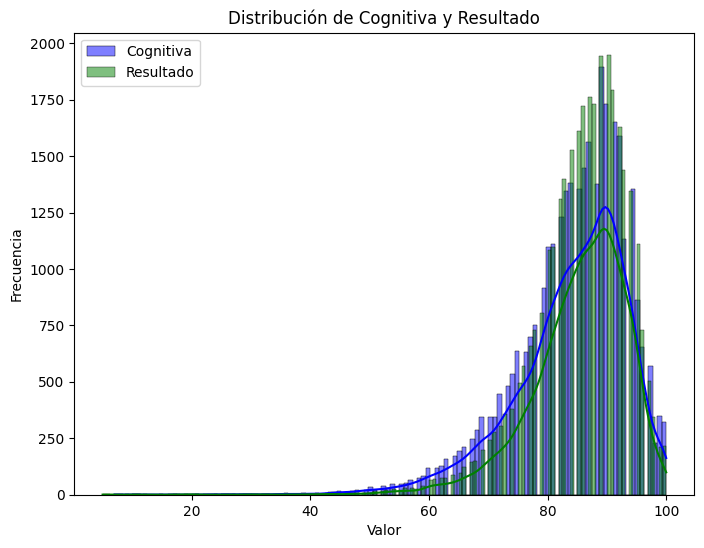

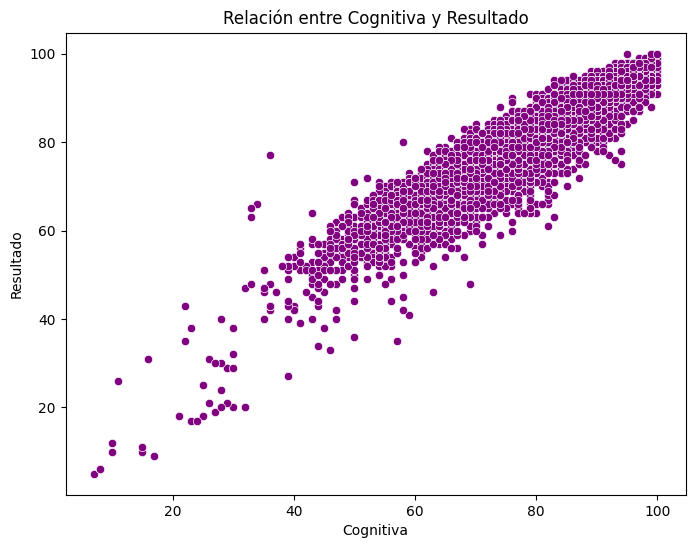

- Coeficiente de correlación de Pearson entre Cognitiva y Resultado: 0.94
- Coeficiente de correlación de Spearman entre Cognitiva y Resultado: 0.94

Resumen de los resultados:
   Columna 1  Columna 2  Coef. Pearson  Coef. Spearman
0  Cognitiva  Resultado       0.944173        0.944846

Estadísticas descriptivas de la columna 'Procedimental':
count    32681.00000
mean        83.74655
std         10.10207
min          7.00000
25%         79.00000
50%         86.00000
75%         91.00000
max        100.00000
Name: Procedimental, dtype: float64

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32681.000000
mean         2.734647
std          1.503778
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64


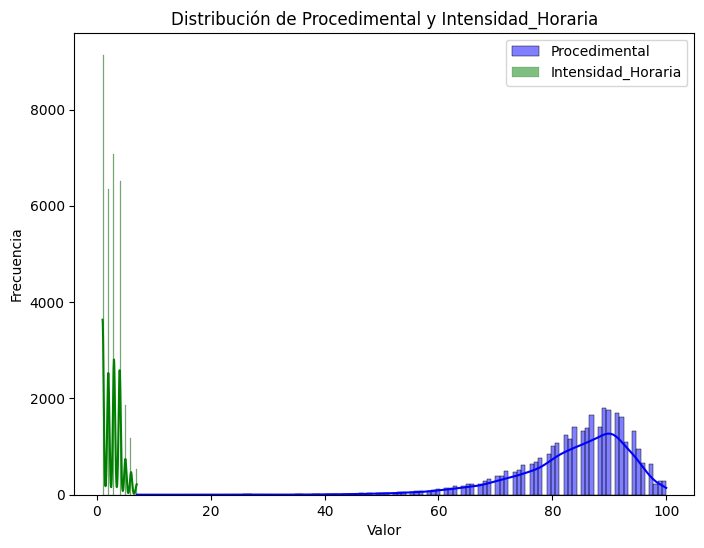

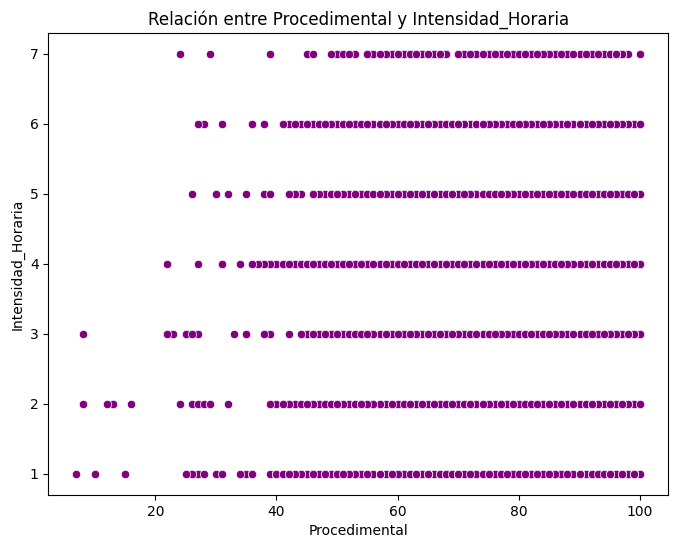

- Coeficiente de correlación de Pearson entre Procedimental y Intensidad_Horaria: -0.29
- Coeficiente de correlación de Spearman entre Procedimental y Intensidad_Horaria: -0.31

Resumen de los resultados:
       Columna 1           Columna 2  Coef. Pearson  Coef. Spearman
0  Procedimental  Intensidad_Horaria      -0.286485       -0.313118

Estadísticas descriptivas de la columna 'Procedimental':
count    32681.00000
mean        83.74655
std         10.10207
min          7.00000
25%         79.00000
50%         86.00000
75%         91.00000
max        100.00000
Name: Procedimental, dtype: float64

Estadísticas descriptivas de la columna 'Cognitiva':
count    32681.000000
mean        83.997827
std          9.672838
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cognitiva, dtype: float64


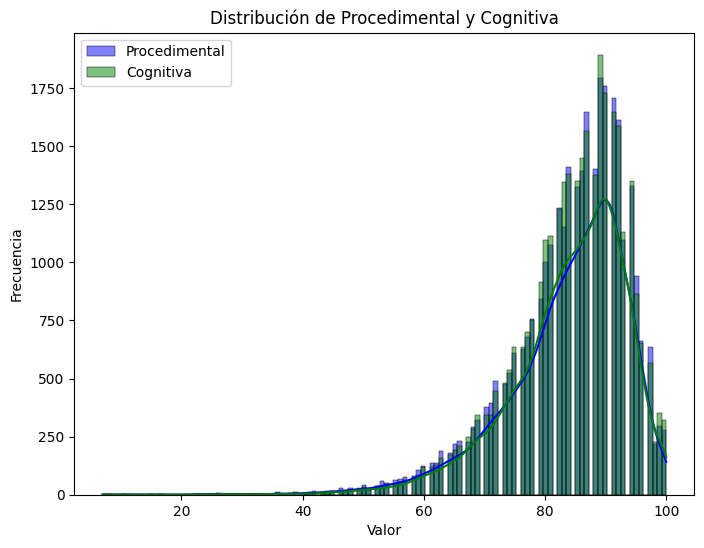

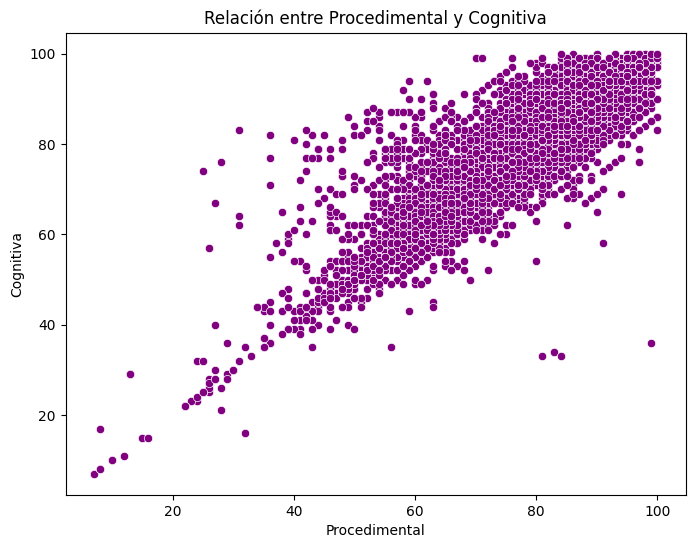

- Coeficiente de correlación de Pearson entre Procedimental y Cognitiva: 0.93
- Coeficiente de correlación de Spearman entre Procedimental y Cognitiva: 0.93

Resumen de los resultados:
       Columna 1  Columna 2  Coef. Pearson  Coef. Spearman
0  Procedimental  Cognitiva       0.928526        0.930244

Estadísticas descriptivas de la columna 'Procedimental':
count    32681.00000
mean        83.74655
std         10.10207
min          7.00000
25%         79.00000
50%         86.00000
75%         91.00000
max        100.00000
Name: Procedimental, dtype: float64

Estadísticas descriptivas de la columna 'Actitudinal':
count    32681.000000
mean        88.142835
std          9.087557
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Actitudinal, dtype: float64


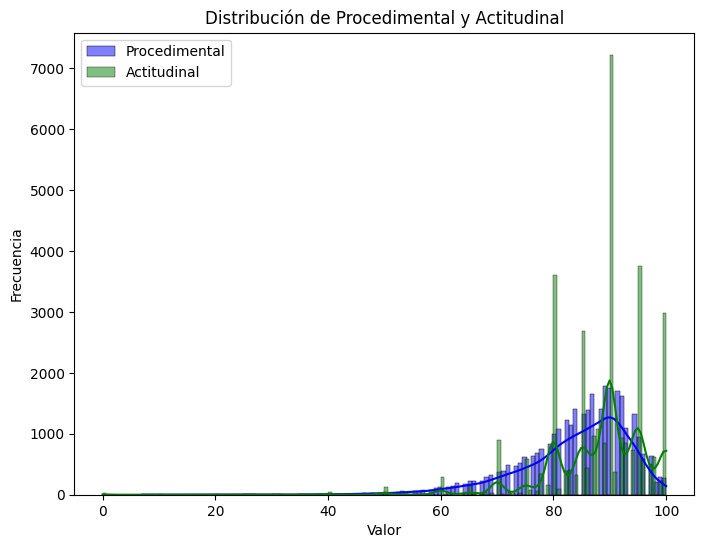

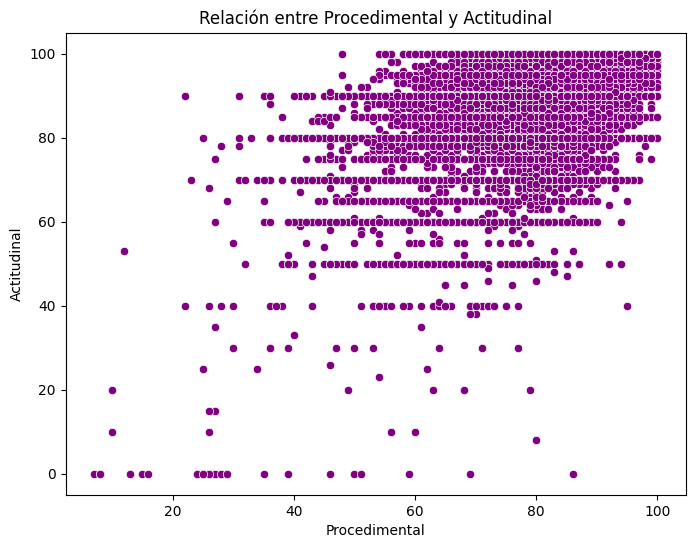

- Coeficiente de correlación de Pearson entre Procedimental y Actitudinal: 0.53
- Coeficiente de correlación de Spearman entre Procedimental y Actitudinal: 0.51

Resumen de los resultados:
       Columna 1    Columna 2  Coef. Pearson  Coef. Spearman
0  Procedimental  Actitudinal       0.533492        0.509521

Estadísticas descriptivas de la columna 'Procedimental':
count    32681.00000
mean        83.74655
std         10.10207
min          7.00000
25%         79.00000
50%         86.00000
75%         91.00000
max        100.00000
Name: Procedimental, dtype: float64

Estadísticas descriptivas de la columna 'Axiologica':
count    32681.000000
mean        89.805147
std          8.445080
min          0.000000
25%         86.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axiologica, dtype: float64


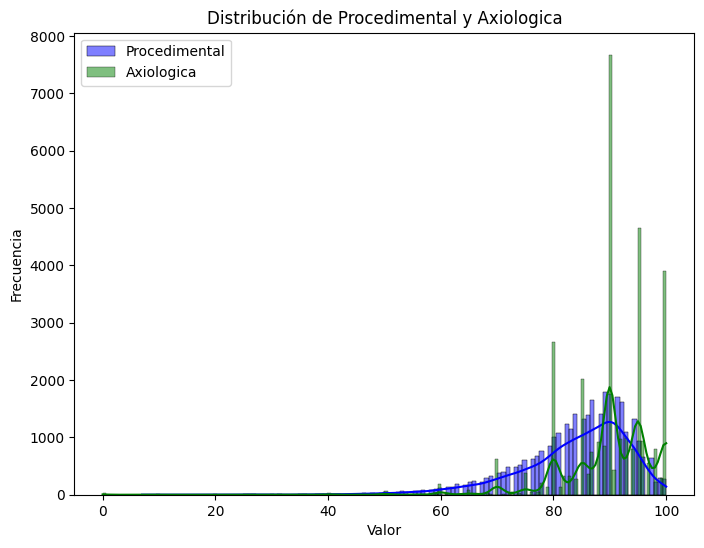

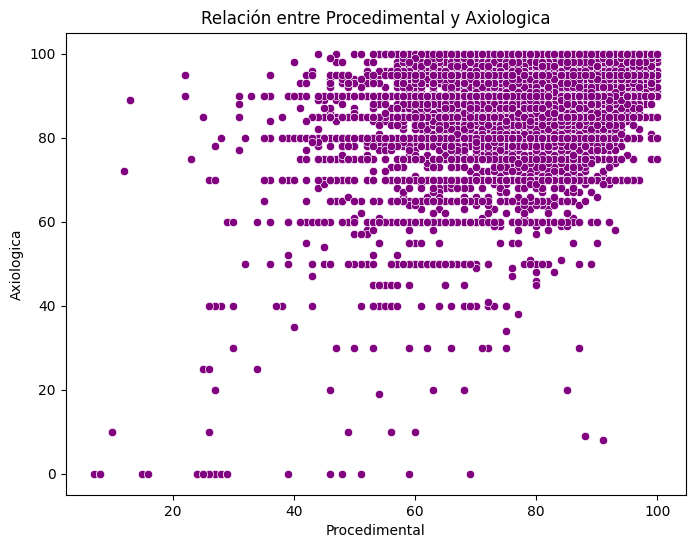

- Coeficiente de correlación de Pearson entre Procedimental y Axiologica: 0.44
- Coeficiente de correlación de Spearman entre Procedimental y Axiologica: 0.39

Resumen de los resultados:
       Columna 1   Columna 2  Coef. Pearson  Coef. Spearman
0  Procedimental  Axiologica       0.435292        0.394427

Estadísticas descriptivas de la columna 'Procedimental':
count    32681.00000
mean        83.74655
std         10.10207
min          7.00000
25%         79.00000
50%         86.00000
75%         91.00000
max        100.00000
Name: Procedimental, dtype: float64

Estadísticas descriptivas de la columna 'Resultado':
count    32681.000000
mean        85.429271
std          8.291707
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64


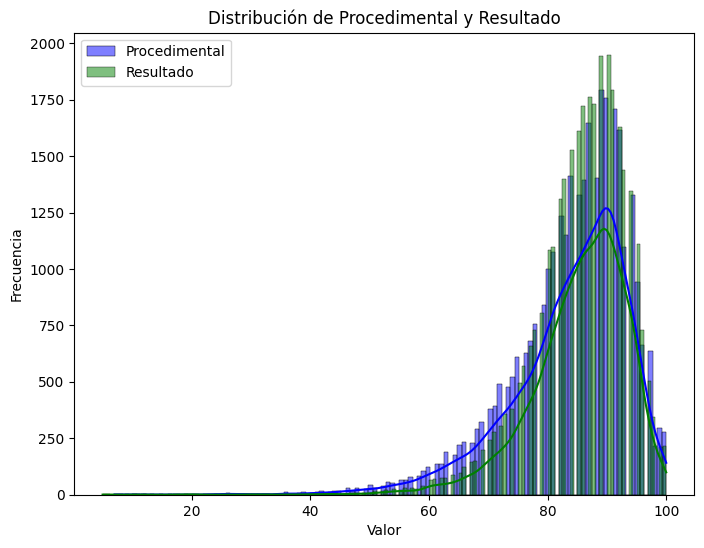

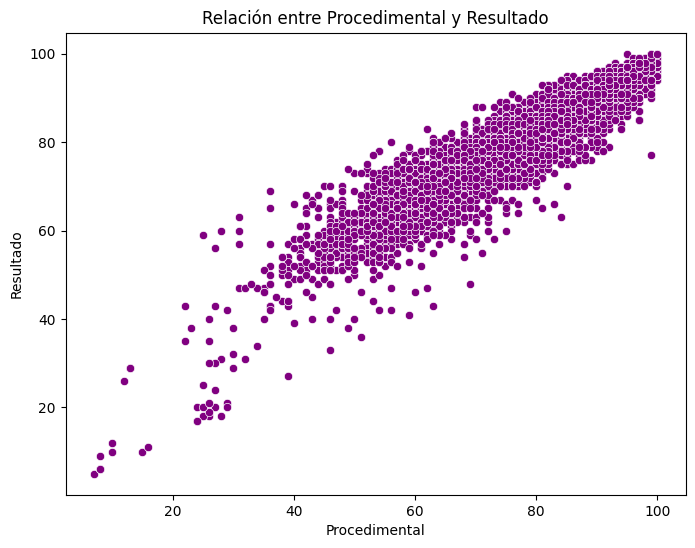

- Coeficiente de correlación de Pearson entre Procedimental y Resultado: 0.95
- Coeficiente de correlación de Spearman entre Procedimental y Resultado: 0.95

Resumen de los resultados:
       Columna 1  Columna 2  Coef. Pearson  Coef. Spearman
0  Procedimental  Resultado        0.95067         0.95216

Estadísticas descriptivas de la columna 'Actitudinal':
count    32681.000000
mean        88.142835
std          9.087557
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Actitudinal, dtype: float64

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32681.000000
mean         2.734647
std          1.503778
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64


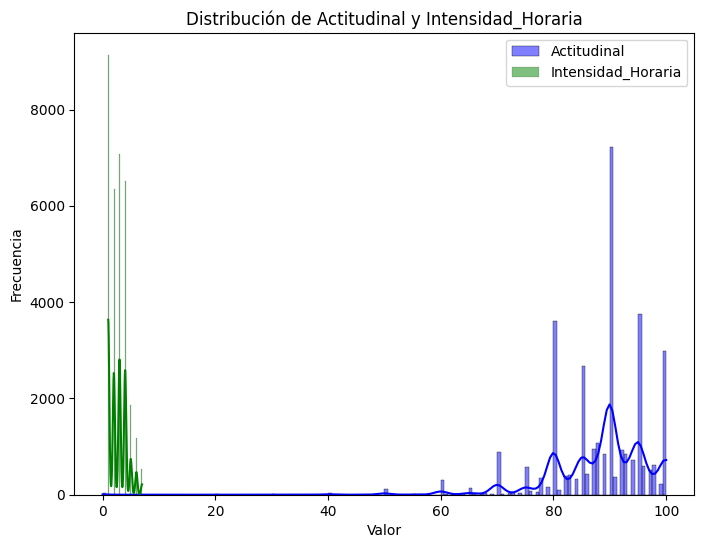

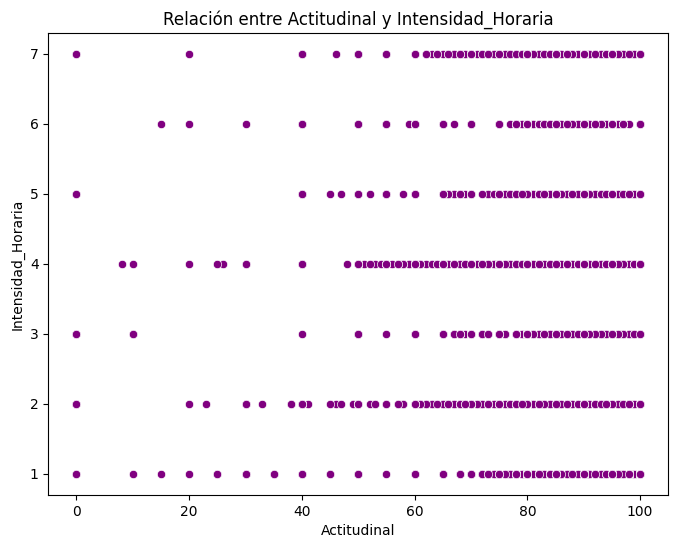

- Coeficiente de correlación de Pearson entre Actitudinal y Intensidad_Horaria: -0.03
- Coeficiente de correlación de Spearman entre Actitudinal y Intensidad_Horaria: -0.01

Resumen de los resultados:
     Columna 1           Columna 2  Coef. Pearson  Coef. Spearman
0  Actitudinal  Intensidad_Horaria      -0.032632        -0.01499

Estadísticas descriptivas de la columna 'Actitudinal':
count    32681.000000
mean        88.142835
std          9.087557
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Actitudinal, dtype: float64

Estadísticas descriptivas de la columna 'Cognitiva':
count    32681.000000
mean        83.997827
std          9.672838
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cognitiva, dtype: float64


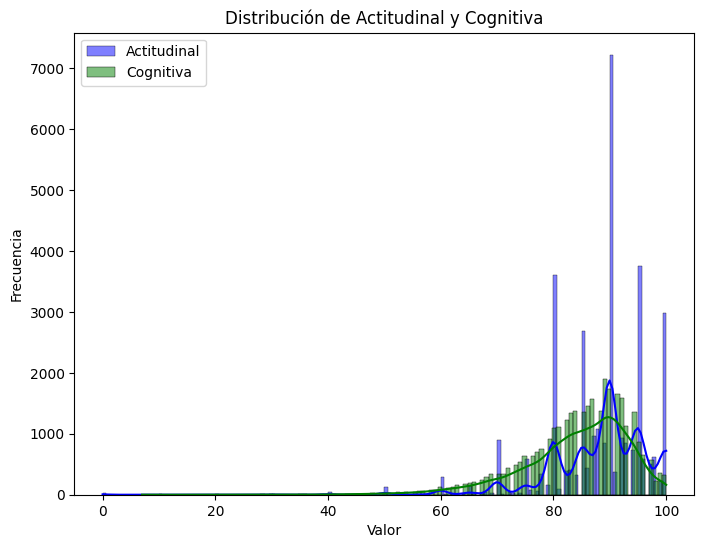

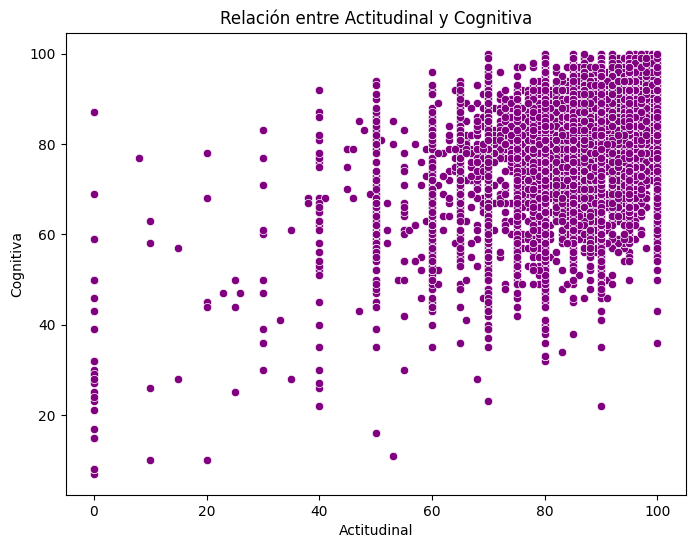

- Coeficiente de correlación de Pearson entre Actitudinal y Cognitiva: 0.51
- Coeficiente de correlación de Spearman entre Actitudinal y Cognitiva: 0.49

Resumen de los resultados:
     Columna 1  Columna 2  Coef. Pearson  Coef. Spearman
0  Actitudinal  Cognitiva       0.513691        0.494638

Estadísticas descriptivas de la columna 'Actitudinal':
count    32681.000000
mean        88.142835
std          9.087557
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Actitudinal, dtype: float64

Estadísticas descriptivas de la columna 'Procedimental':
count    32681.00000
mean        83.74655
std         10.10207
min          7.00000
25%         79.00000
50%         86.00000
75%         91.00000
max        100.00000
Name: Procedimental, dtype: float64


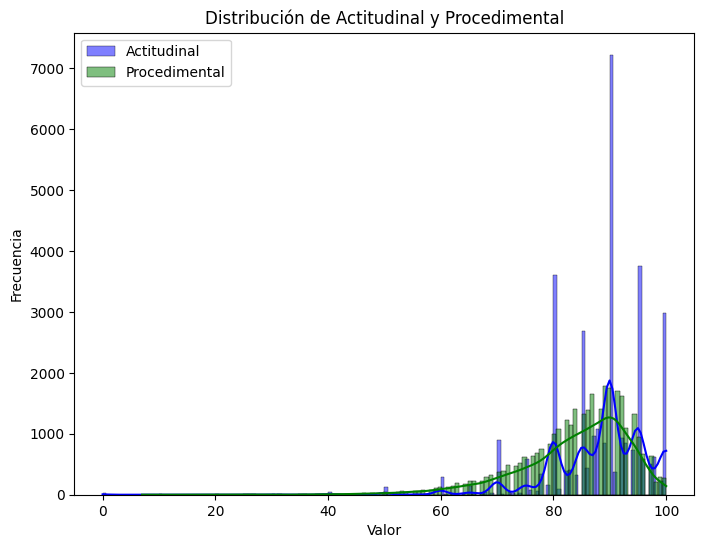

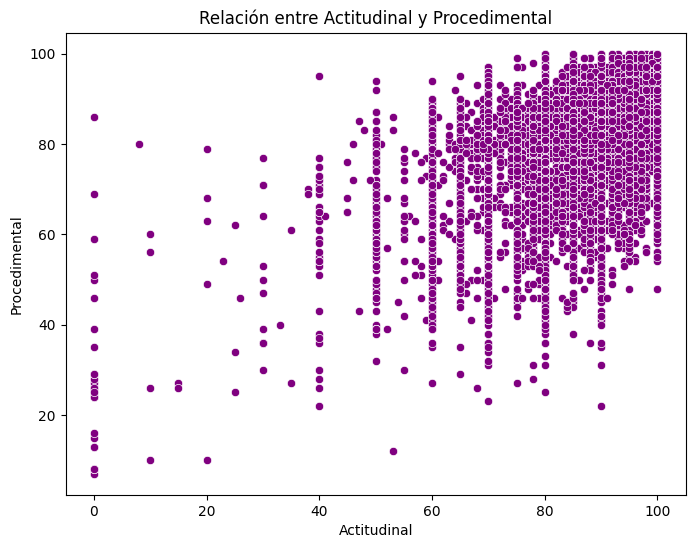

- Coeficiente de correlación de Pearson entre Actitudinal y Procedimental: 0.53
- Coeficiente de correlación de Spearman entre Actitudinal y Procedimental: 0.51

Resumen de los resultados:
     Columna 1      Columna 2  Coef. Pearson  Coef. Spearman
0  Actitudinal  Procedimental       0.533492        0.509521

Estadísticas descriptivas de la columna 'Actitudinal':
count    32681.000000
mean        88.142835
std          9.087557
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Actitudinal, dtype: float64

Estadísticas descriptivas de la columna 'Axiologica':
count    32681.000000
mean        89.805147
std          8.445080
min          0.000000
25%         86.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axiologica, dtype: float64


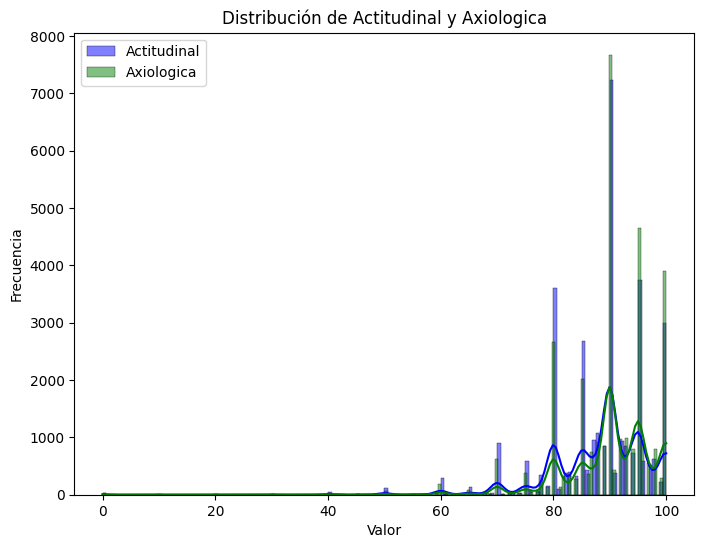

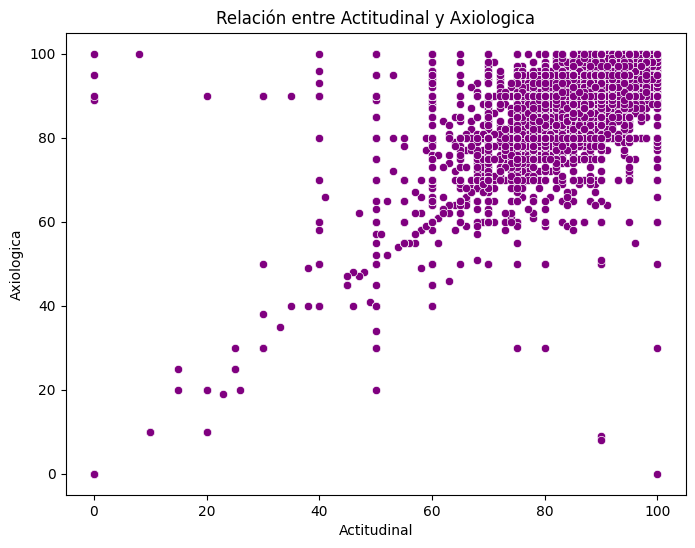

- Coeficiente de correlación de Pearson entre Actitudinal y Axiologica: 0.74
- Coeficiente de correlación de Spearman entre Actitudinal y Axiologica: 0.72

Resumen de los resultados:
     Columna 1   Columna 2  Coef. Pearson  Coef. Spearman
0  Actitudinal  Axiologica       0.742934        0.717801

Estadísticas descriptivas de la columna 'Actitudinal':
count    32681.000000
mean        88.142835
std          9.087557
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Actitudinal, dtype: float64

Estadísticas descriptivas de la columna 'Resultado':
count    32681.000000
mean        85.429271
std          8.291707
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64


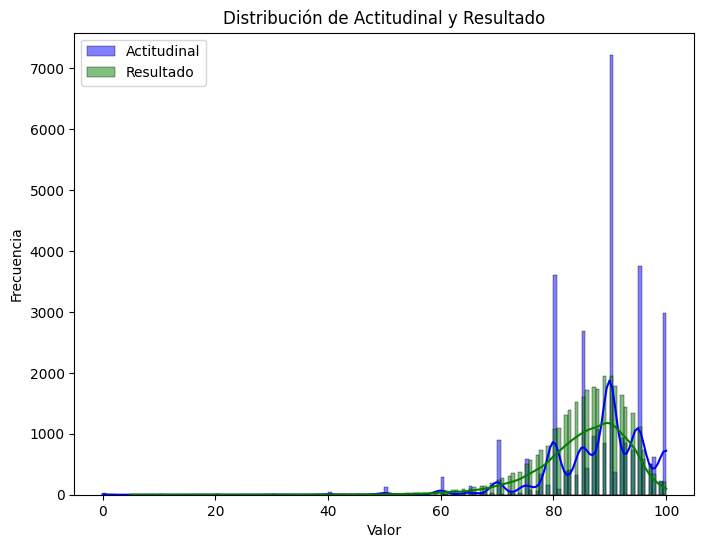

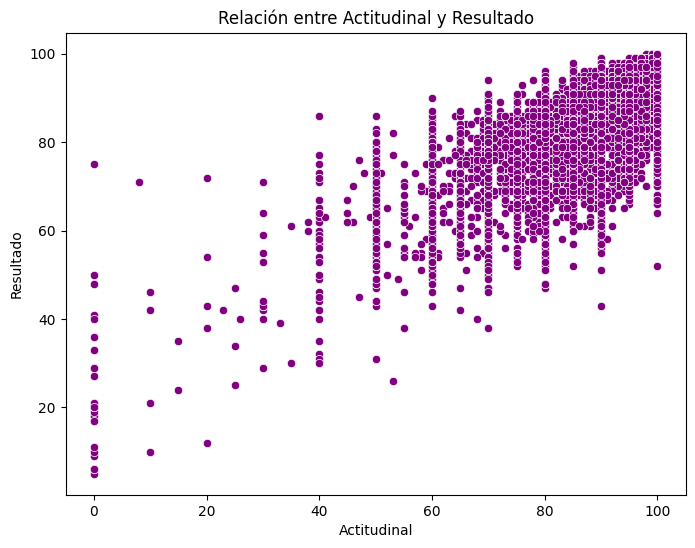

- Coeficiente de correlación de Pearson entre Actitudinal y Resultado: 0.71
- Coeficiente de correlación de Spearman entre Actitudinal y Resultado: 0.68

Resumen de los resultados:
     Columna 1  Columna 2  Coef. Pearson  Coef. Spearman
0  Actitudinal  Resultado       0.714864        0.676248

Estadísticas descriptivas de la columna 'Axiologica':
count    32681.000000
mean        89.805147
std          8.445080
min          0.000000
25%         86.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axiologica, dtype: float64

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32681.000000
mean         2.734647
std          1.503778
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64


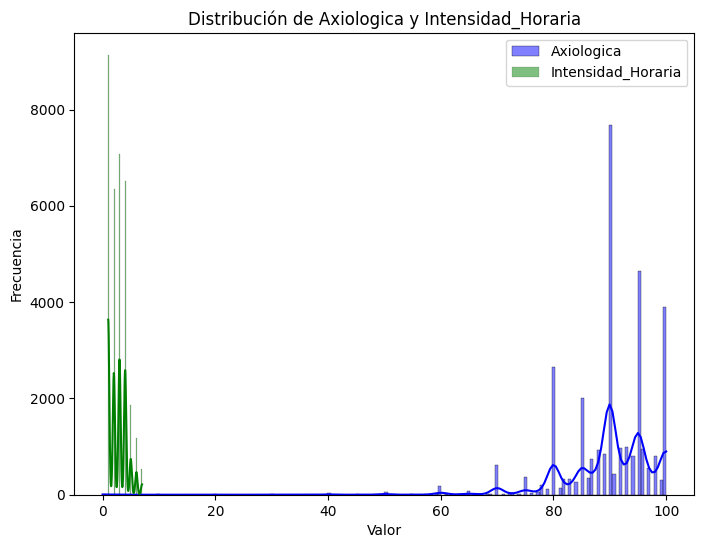

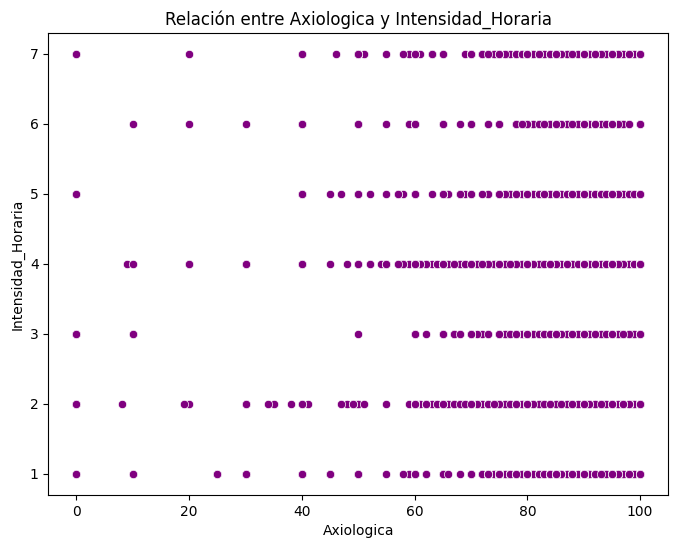

- Coeficiente de correlación de Pearson entre Axiologica y Intensidad_Horaria: -0.02
- Coeficiente de correlación de Spearman entre Axiologica y Intensidad_Horaria: 0.00

Resumen de los resultados:
    Columna 1           Columna 2  Coef. Pearson  Coef. Spearman
0  Axiologica  Intensidad_Horaria      -0.021483        0.004917

Estadísticas descriptivas de la columna 'Axiologica':
count    32681.000000
mean        89.805147
std          8.445080
min          0.000000
25%         86.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axiologica, dtype: float64

Estadísticas descriptivas de la columna 'Cognitiva':
count    32681.000000
mean        83.997827
std          9.672838
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cognitiva, dtype: float64


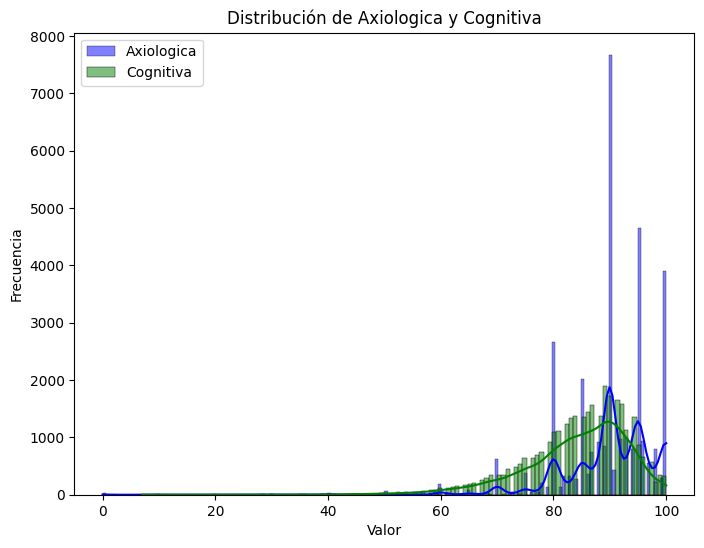

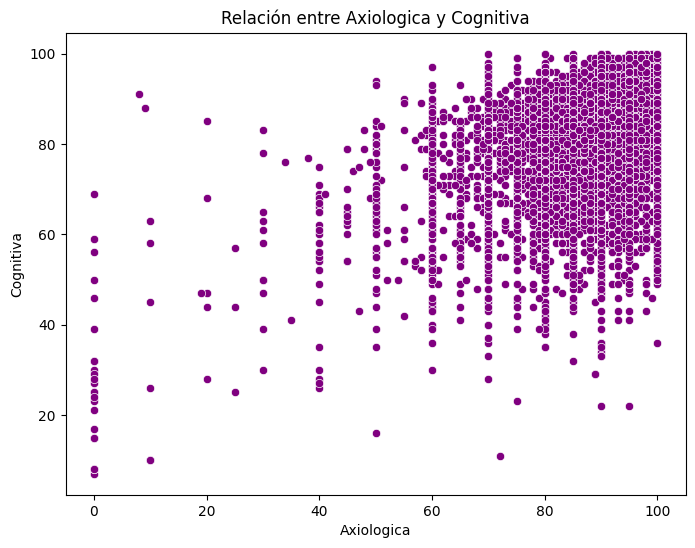

- Coeficiente de correlación de Pearson entre Axiologica y Cognitiva: 0.43
- Coeficiente de correlación de Spearman entre Axiologica y Cognitiva: 0.38

Resumen de los resultados:
    Columna 1  Columna 2  Coef. Pearson  Coef. Spearman
0  Axiologica  Cognitiva       0.427379        0.383865

Estadísticas descriptivas de la columna 'Axiologica':
count    32681.000000
mean        89.805147
std          8.445080
min          0.000000
25%         86.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axiologica, dtype: float64

Estadísticas descriptivas de la columna 'Procedimental':
count    32681.00000
mean        83.74655
std         10.10207
min          7.00000
25%         79.00000
50%         86.00000
75%         91.00000
max        100.00000
Name: Procedimental, dtype: float64


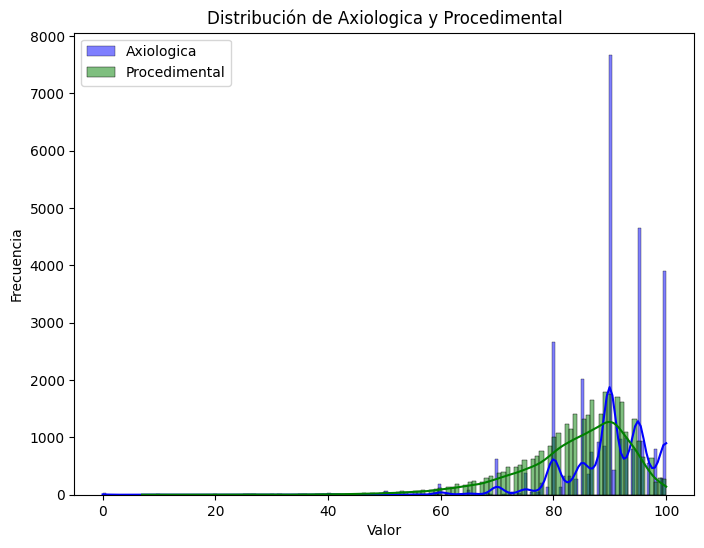

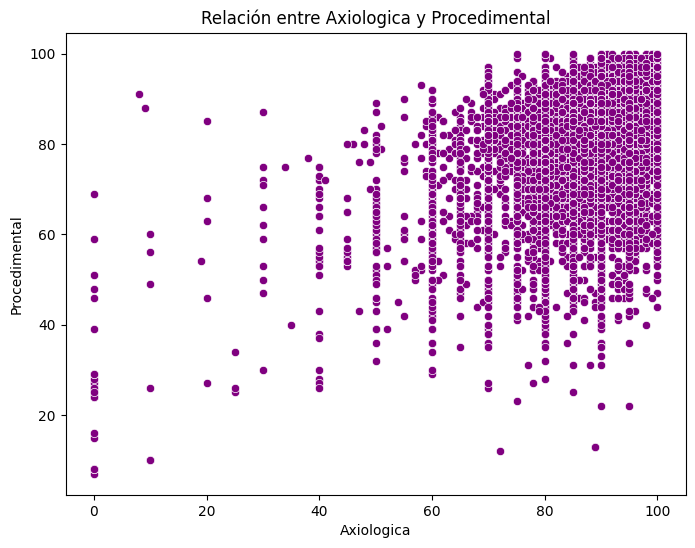

- Coeficiente de correlación de Pearson entre Axiologica y Procedimental: 0.44
- Coeficiente de correlación de Spearman entre Axiologica y Procedimental: 0.39

Resumen de los resultados:
    Columna 1      Columna 2  Coef. Pearson  Coef. Spearman
0  Axiologica  Procedimental       0.435292        0.394427

Estadísticas descriptivas de la columna 'Axiologica':
count    32681.000000
mean        89.805147
std          8.445080
min          0.000000
25%         86.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axiologica, dtype: float64

Estadísticas descriptivas de la columna 'Actitudinal':
count    32681.000000
mean        88.142835
std          9.087557
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Actitudinal, dtype: float64


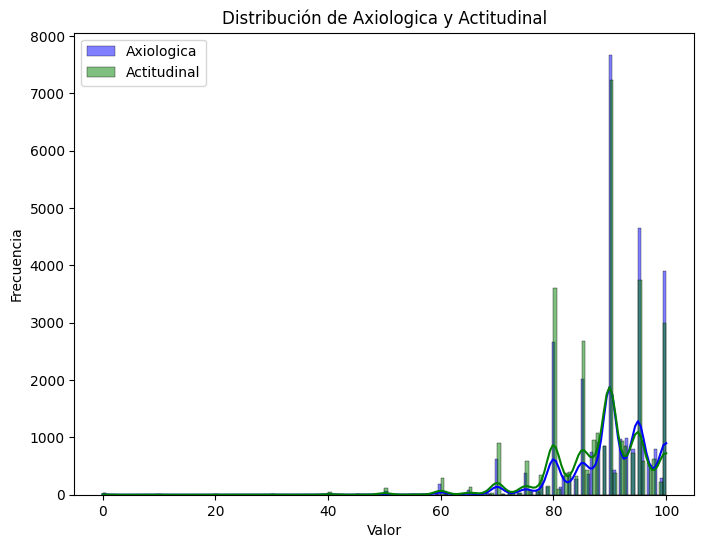

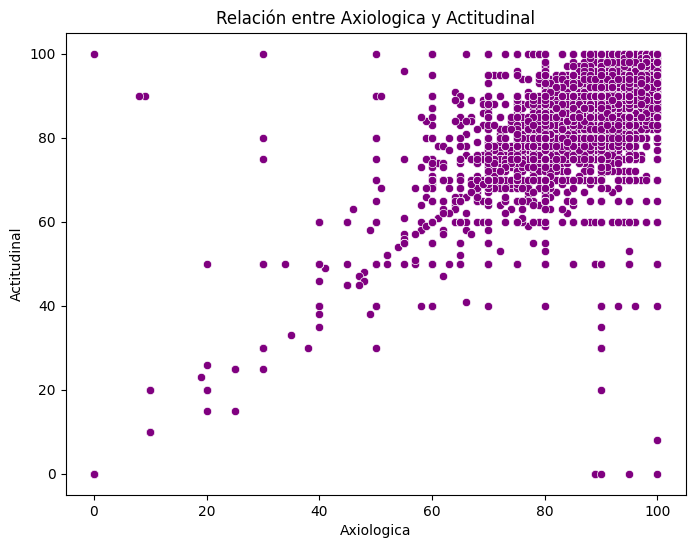

- Coeficiente de correlación de Pearson entre Axiologica y Actitudinal: 0.74
- Coeficiente de correlación de Spearman entre Axiologica y Actitudinal: 0.72

Resumen de los resultados:
    Columna 1    Columna 2  Coef. Pearson  Coef. Spearman
0  Axiologica  Actitudinal       0.742934        0.717801

Estadísticas descriptivas de la columna 'Axiologica':
count    32681.000000
mean        89.805147
std          8.445080
min          0.000000
25%         86.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axiologica, dtype: float64

Estadísticas descriptivas de la columna 'Resultado':
count    32681.000000
mean        85.429271
std          8.291707
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64


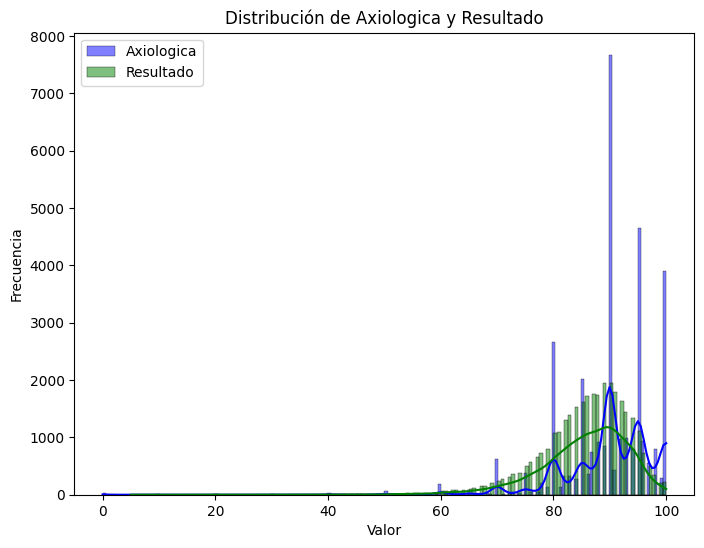

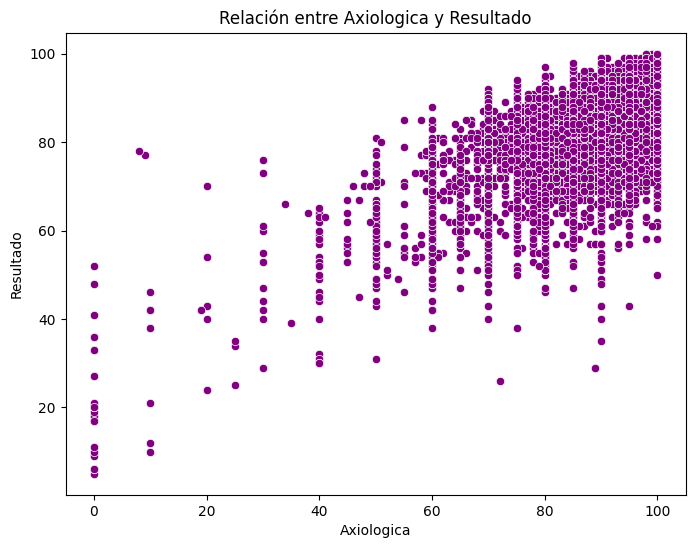

- Coeficiente de correlación de Pearson entre Axiologica y Resultado: 0.64
- Coeficiente de correlación de Spearman entre Axiologica y Resultado: 0.57

Resumen de los resultados:
    Columna 1  Columna 2  Coef. Pearson  Coef. Spearman
0  Axiologica  Resultado       0.635459        0.570396

Estadísticas descriptivas de la columna 'Resultado':
count    32681.000000
mean        85.429271
std          8.291707
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32681.000000
mean         2.734647
std          1.503778
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64


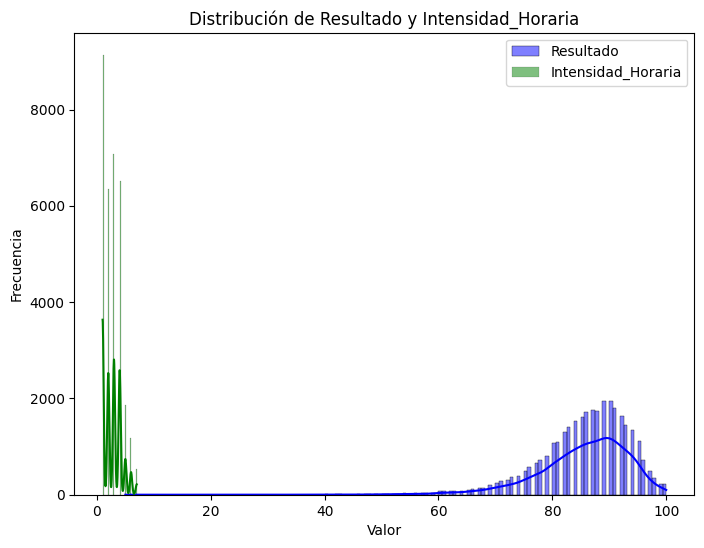

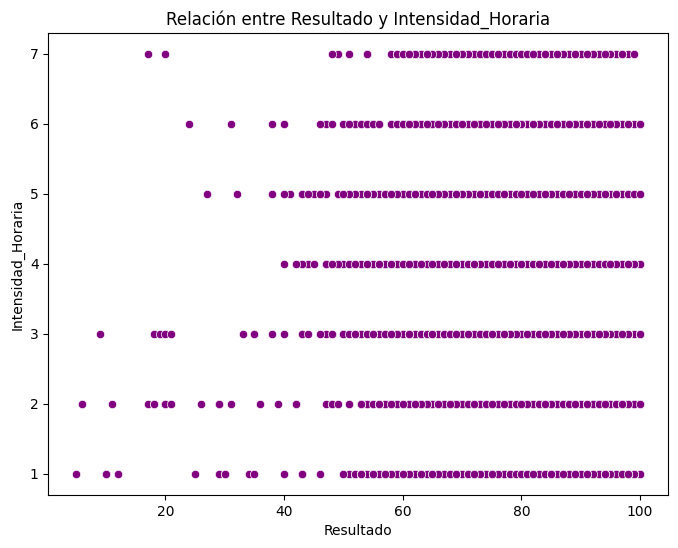

- Coeficiente de correlación de Pearson entre Resultado y Intensidad_Horaria: -0.25
- Coeficiente de correlación de Spearman entre Resultado y Intensidad_Horaria: -0.27

Resumen de los resultados:
   Columna 1           Columna 2  Coef. Pearson  Coef. Spearman
0  Resultado  Intensidad_Horaria      -0.254367       -0.272458

Estadísticas descriptivas de la columna 'Resultado':
count    32681.000000
mean        85.429271
std          8.291707
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64

Estadísticas descriptivas de la columna 'Cognitiva':
count    32681.000000
mean        83.997827
std          9.672838
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cognitiva, dtype: float64


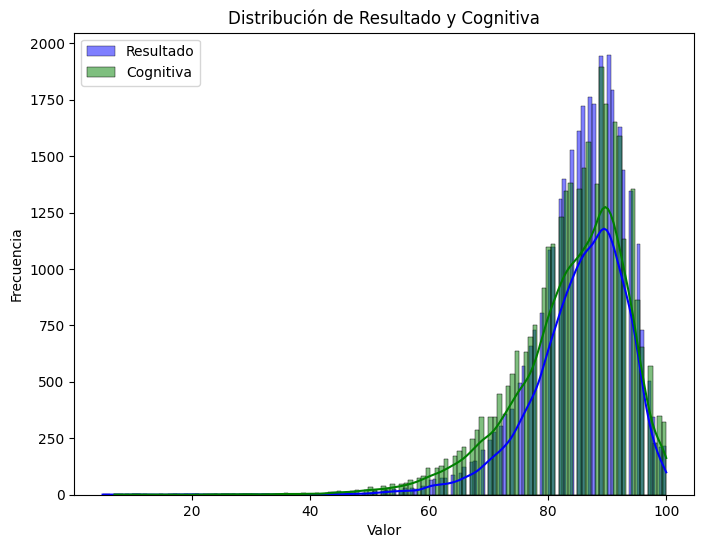

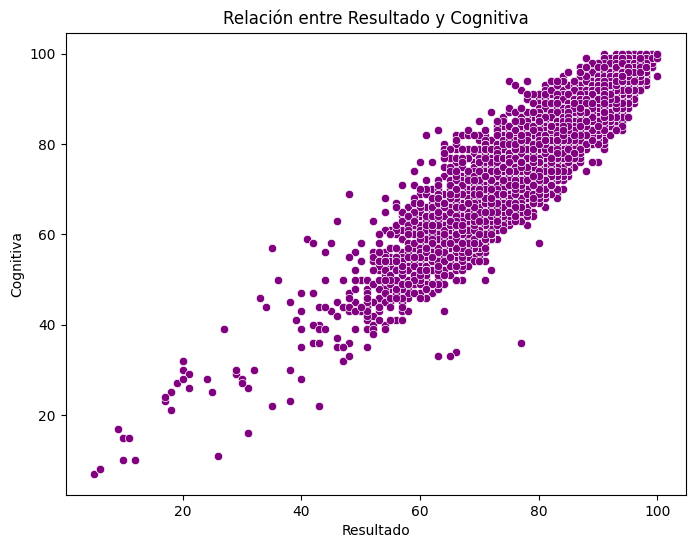

- Coeficiente de correlación de Pearson entre Resultado y Cognitiva: 0.94
- Coeficiente de correlación de Spearman entre Resultado y Cognitiva: 0.94

Resumen de los resultados:
   Columna 1  Columna 2  Coef. Pearson  Coef. Spearman
0  Resultado  Cognitiva       0.944173        0.944846

Estadísticas descriptivas de la columna 'Resultado':
count    32681.000000
mean        85.429271
std          8.291707
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64

Estadísticas descriptivas de la columna 'Procedimental':
count    32681.00000
mean        83.74655
std         10.10207
min          7.00000
25%         79.00000
50%         86.00000
75%         91.00000
max        100.00000
Name: Procedimental, dtype: float64


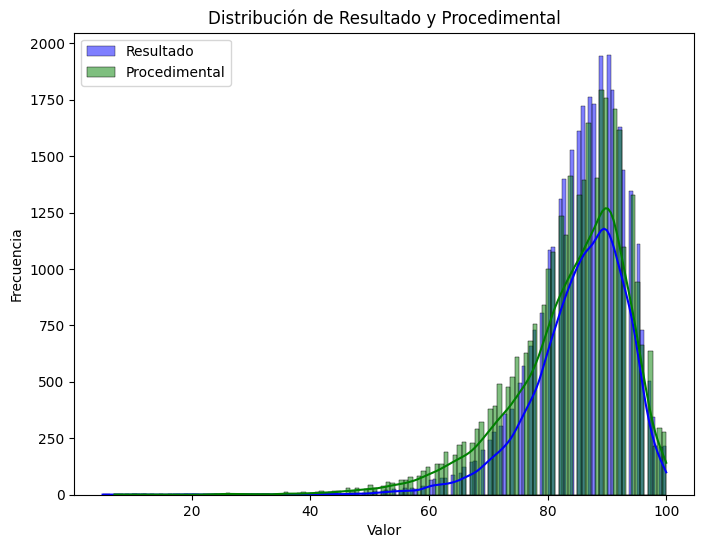

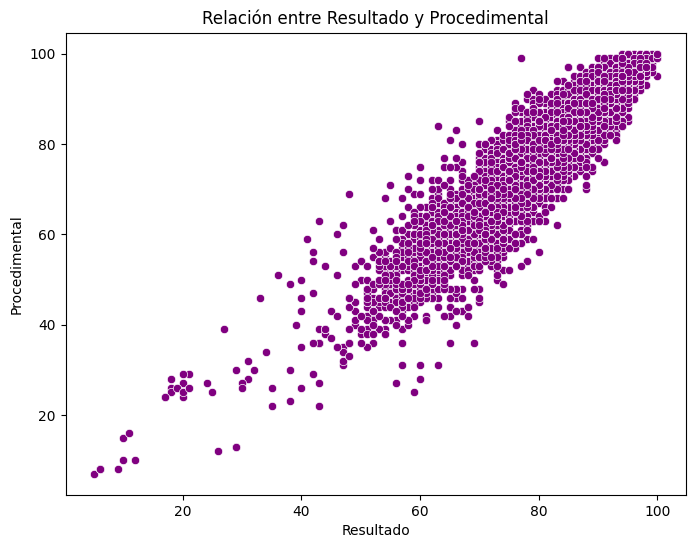

- Coeficiente de correlación de Pearson entre Resultado y Procedimental: 0.95
- Coeficiente de correlación de Spearman entre Resultado y Procedimental: 0.95

Resumen de los resultados:
   Columna 1      Columna 2  Coef. Pearson  Coef. Spearman
0  Resultado  Procedimental        0.95067         0.95216

Estadísticas descriptivas de la columna 'Resultado':
count    32681.000000
mean        85.429271
std          8.291707
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64

Estadísticas descriptivas de la columna 'Actitudinal':
count    32681.000000
mean        88.142835
std          9.087557
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Actitudinal, dtype: float64


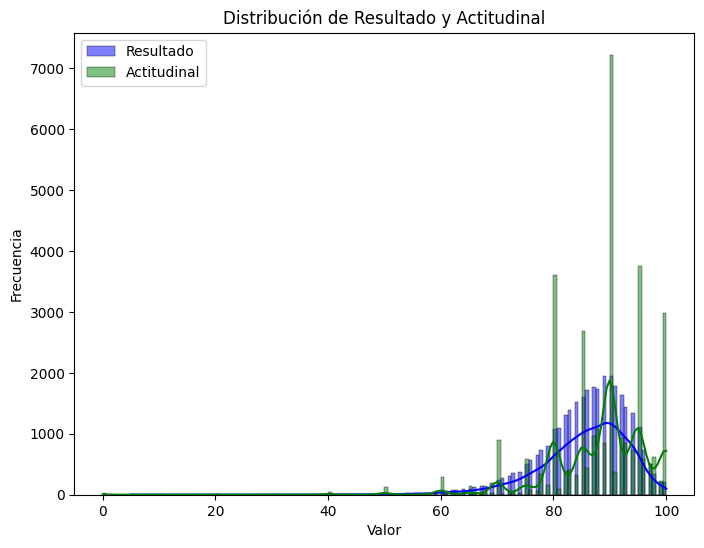

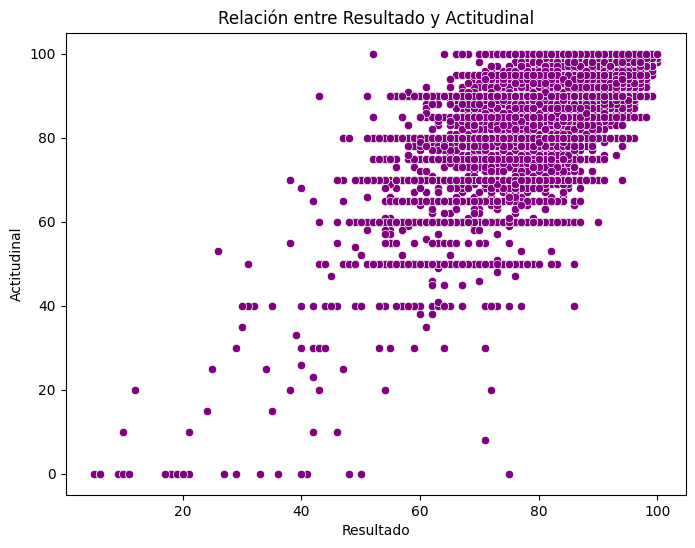

- Coeficiente de correlación de Pearson entre Resultado y Actitudinal: 0.71
- Coeficiente de correlación de Spearman entre Resultado y Actitudinal: 0.68

Resumen de los resultados:
   Columna 1    Columna 2  Coef. Pearson  Coef. Spearman
0  Resultado  Actitudinal       0.714864        0.676248

Estadísticas descriptivas de la columna 'Resultado':
count    32681.000000
mean        85.429271
std          8.291707
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64

Estadísticas descriptivas de la columna 'Axiologica':
count    32681.000000
mean        89.805147
std          8.445080
min          0.000000
25%         86.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axiologica, dtype: float64


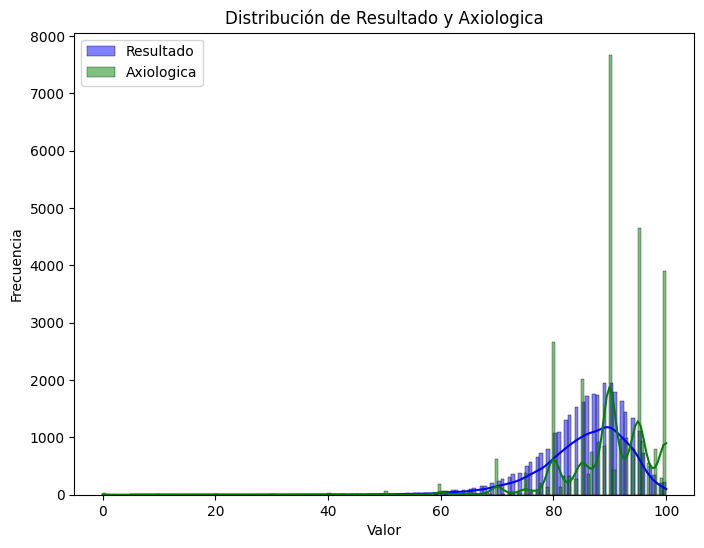

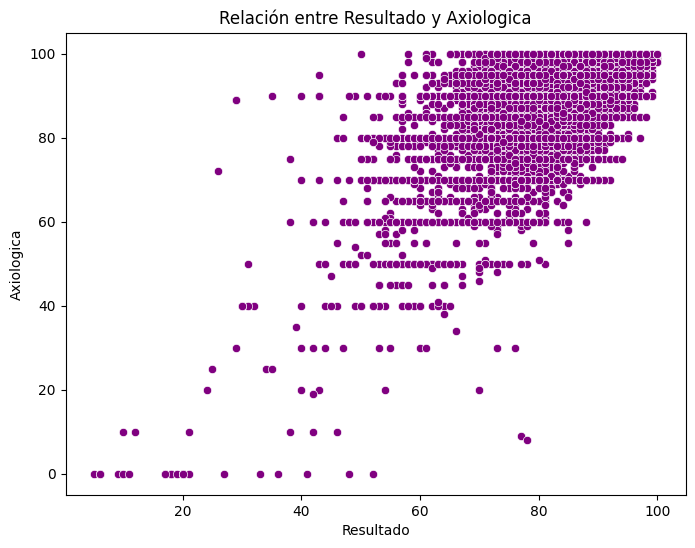

- Coeficiente de correlación de Pearson entre Resultado y Axiologica: 0.64
- Coeficiente de correlación de Spearman entre Resultado y Axiologica: 0.57

Resumen de los resultados:
   Columna 1   Columna 2  Coef. Pearson  Coef. Spearman
0  Resultado  Axiologica       0.635459        0.570396


In [8]:
numeric_cols = df_limpio.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_limpio.select_dtypes(include=['object']).columns.tolist()
# Llamar la función para dos variables numéricas
for col in numeric_cols:
    for col2 in numeric_cols:
        if col != col2:
            # Llamar a la función para dos variables numéricas
            eda_num_bivariado_notes=eda.analisis_bivariado( col, col2)
eda_num_bivariado_notes.to_csv("../../data/processed/eda_bivariado_numeric_notes.csv", index=False)
    


2. Análisis Bivariado: Variables Categóricas vs Categóricas
Cuando las dos variables son categóricas, se analiza la relación a través de una tabla de contingencia y se calcula el test de chi-cuadrado.

In [9]:
# Llamar a la función para variable categóricas
for col in categorical_cols:
    for col2 in categorical_cols:
        if col != col2:
            # Llamar a la función para dos variables categóricas
            eda_cramers_v_notes=eda.cramers_v( col, col2)

eda_cramers_v_notes.to_csv("../../data/processed/eda_cramers_v_notes.csv", index=False)

3. Análisis Bivariado: Variables Numéricas vs Categóricas
Cuando se analiza una variable numérica con una categórica, se utiliza un gráfico de cajas y el test ANOVA para verificar si existen diferencias significativas.

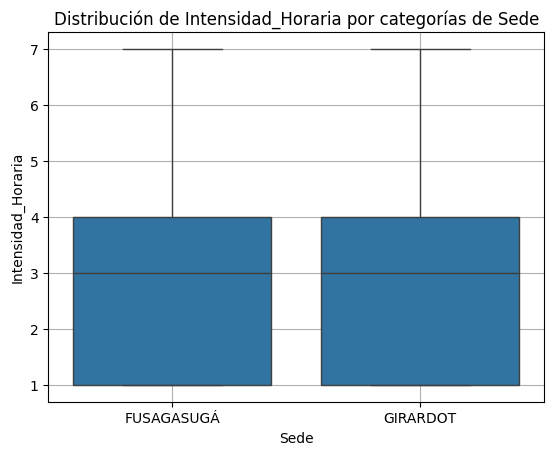

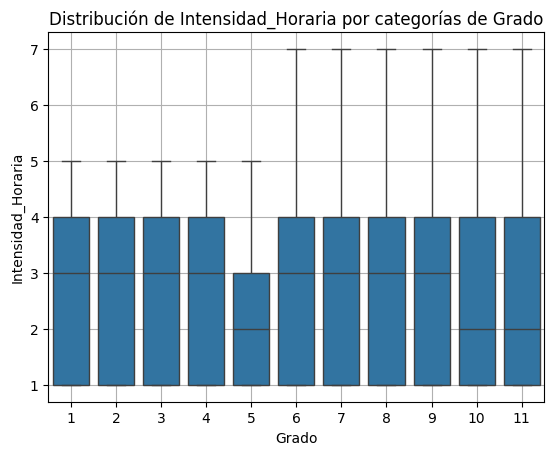

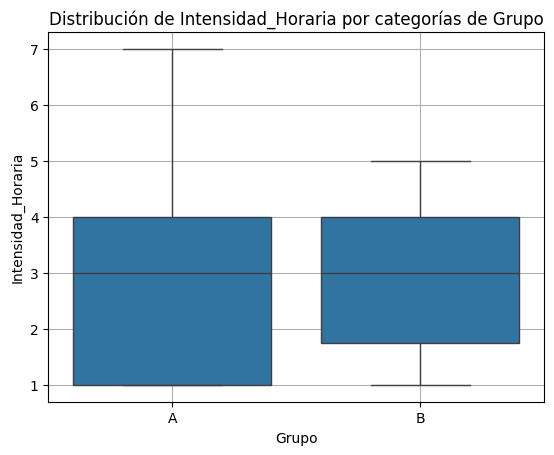

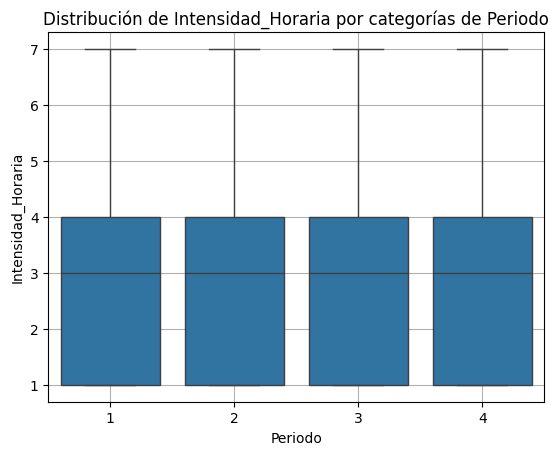

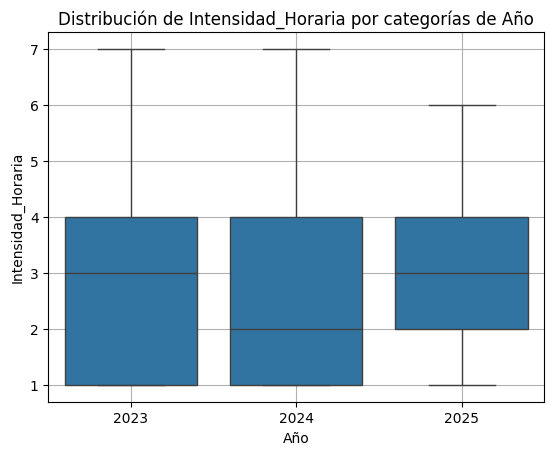

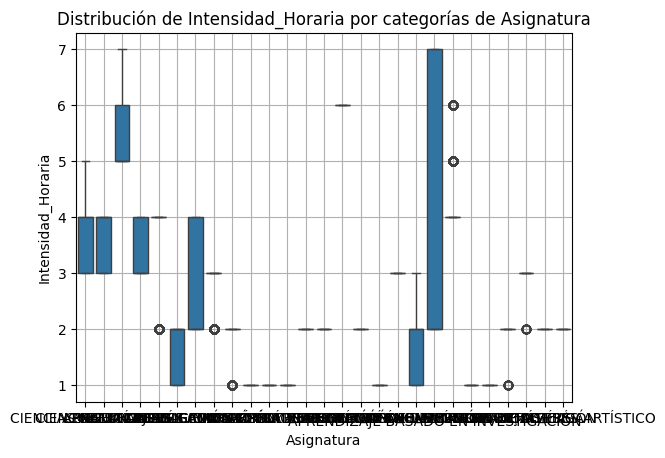

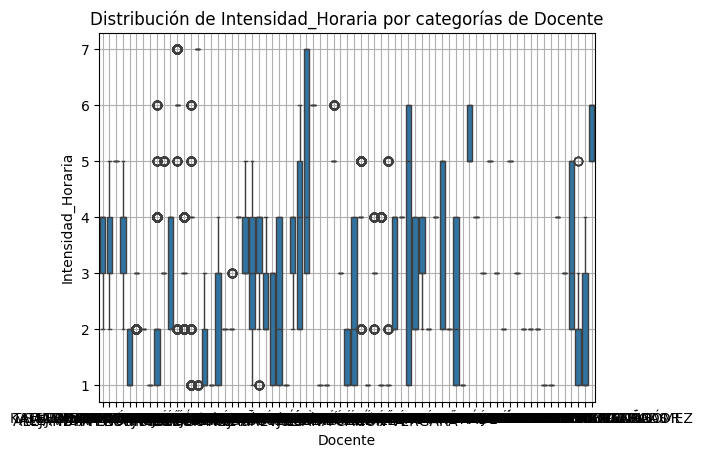

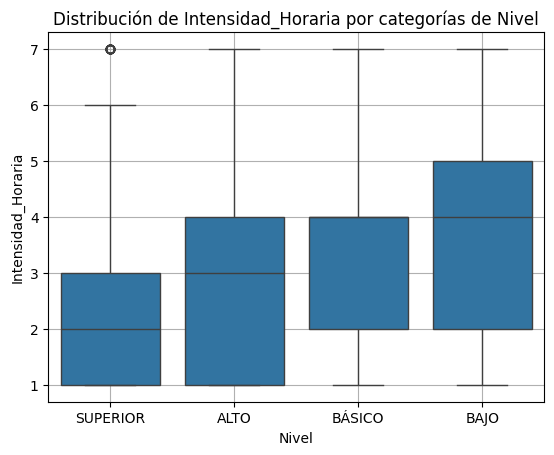

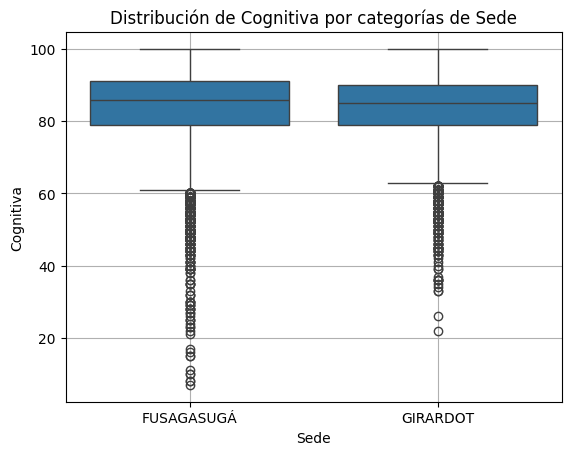

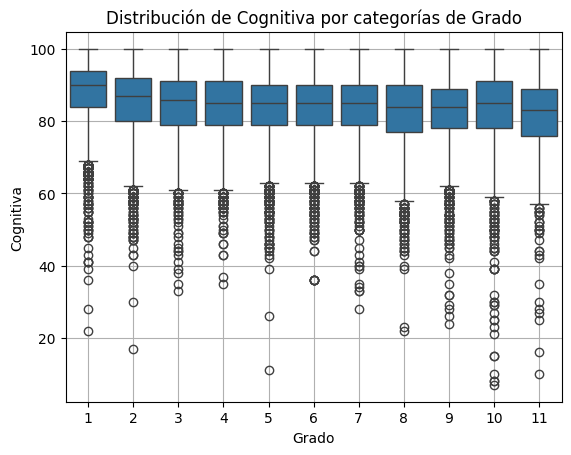

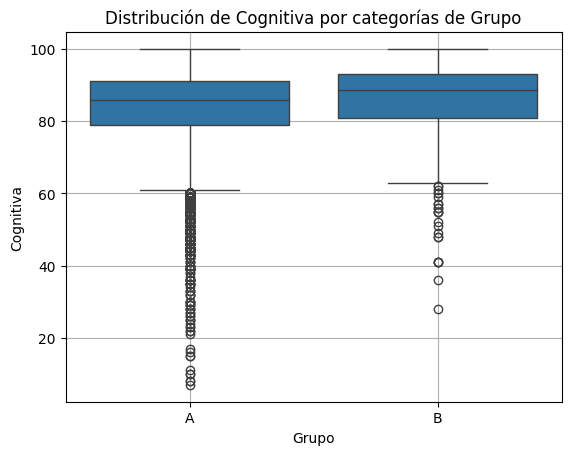

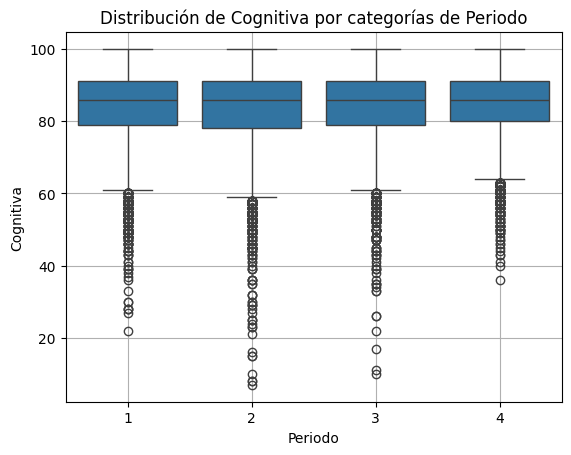

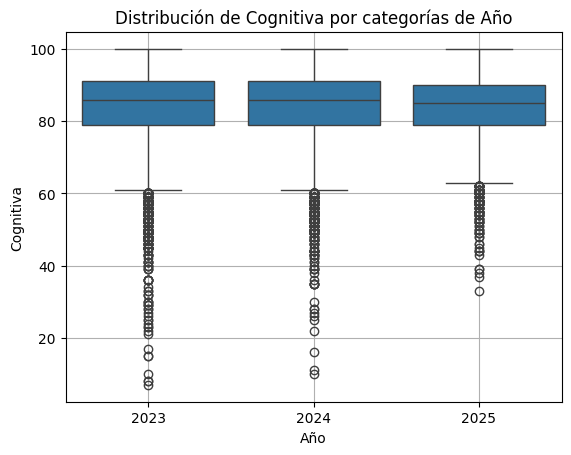

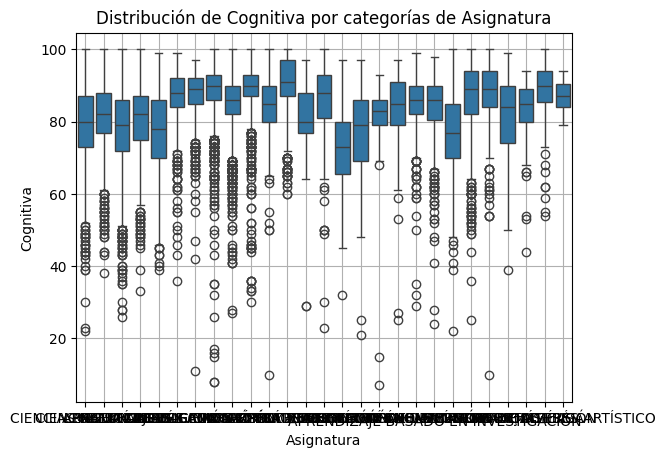

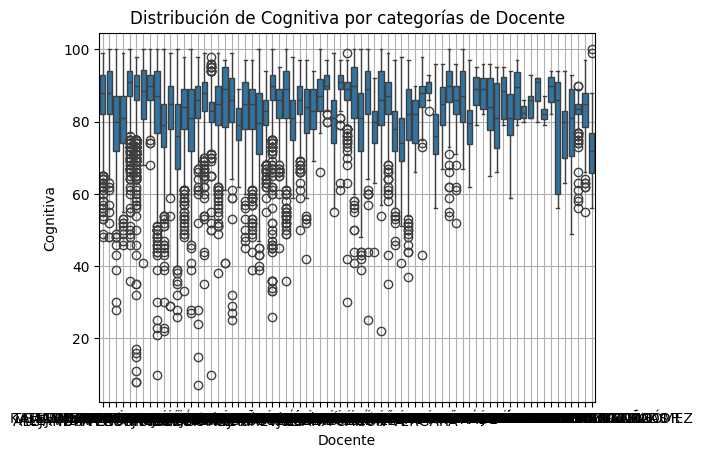

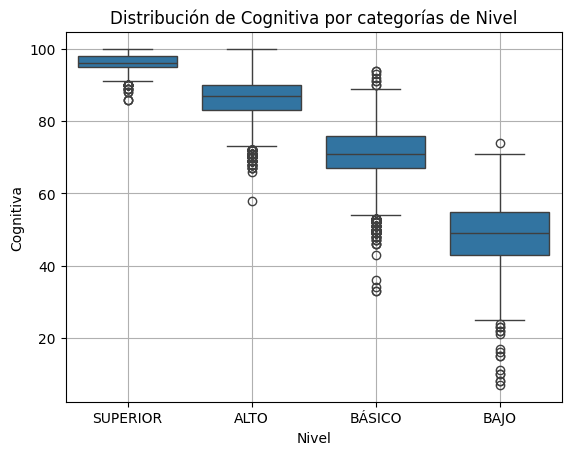

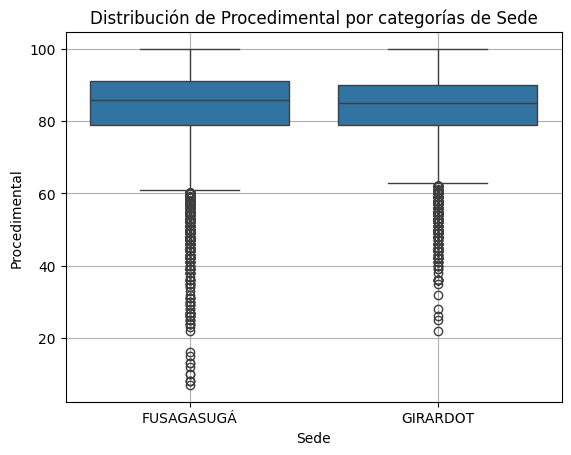

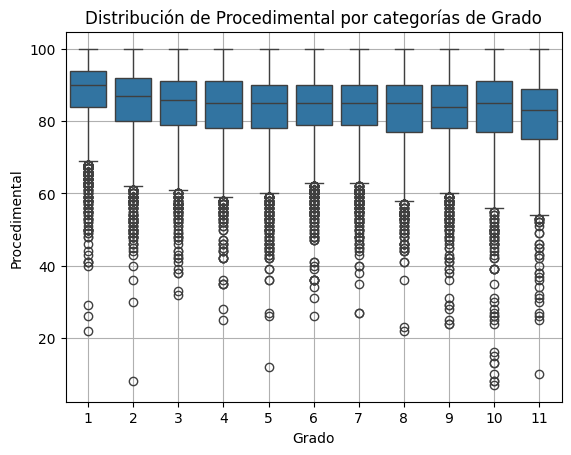

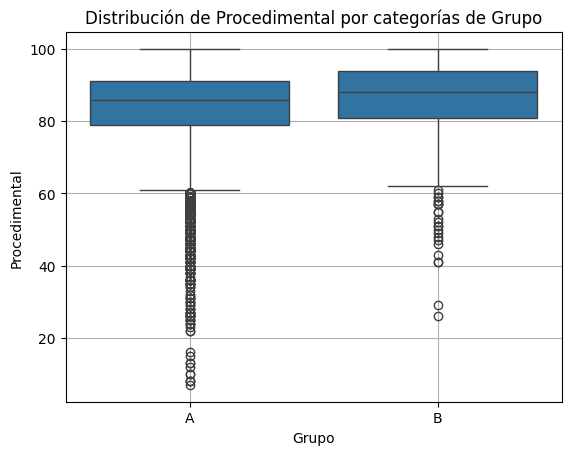

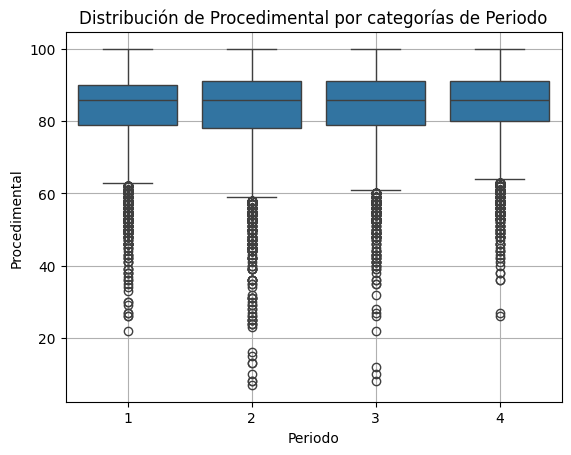

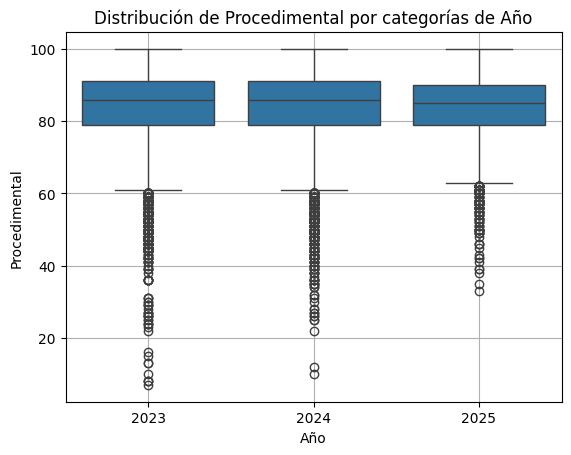

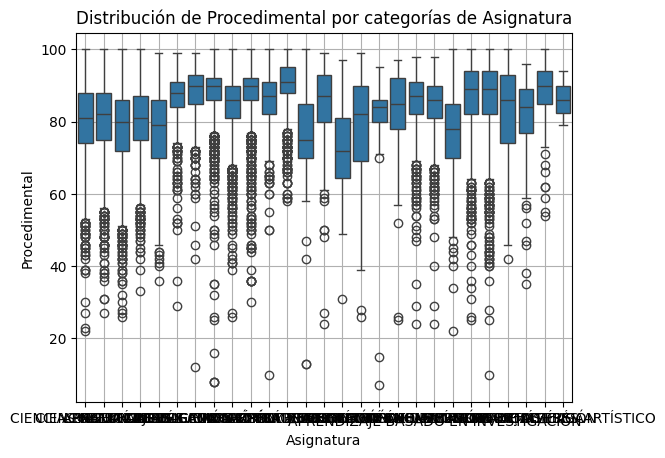

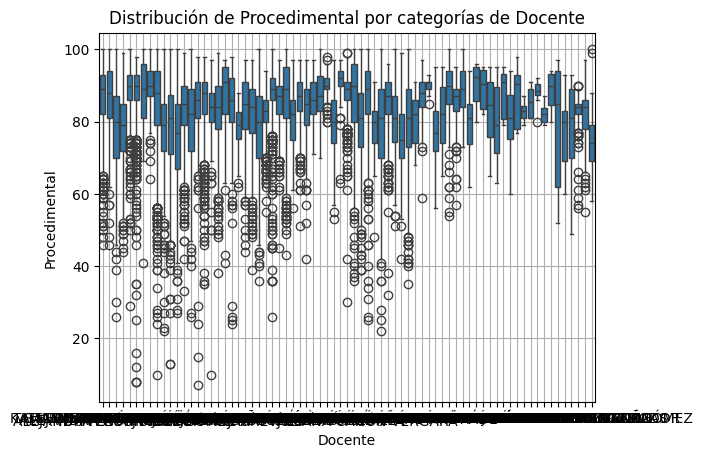

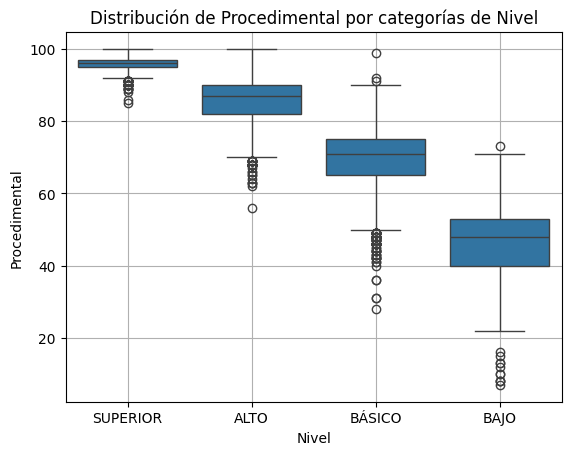

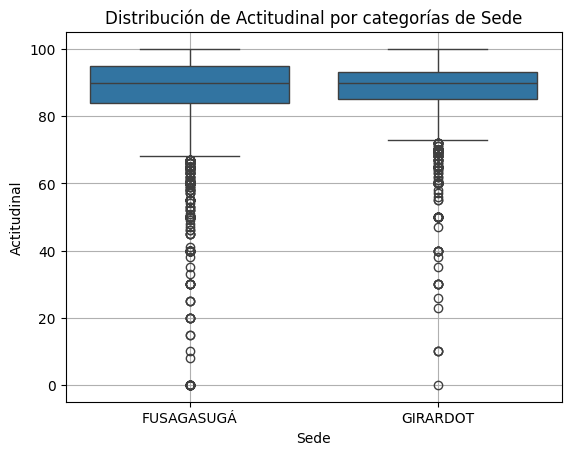

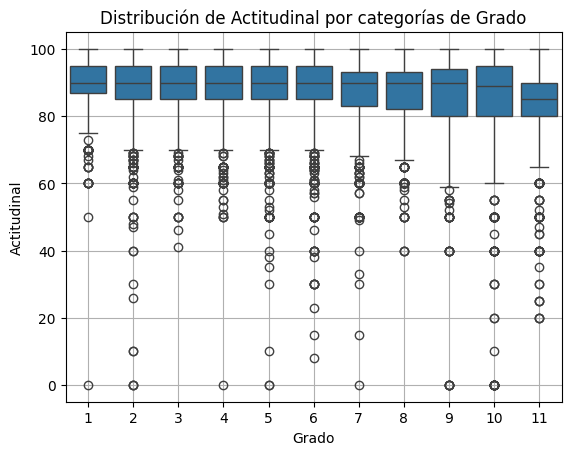

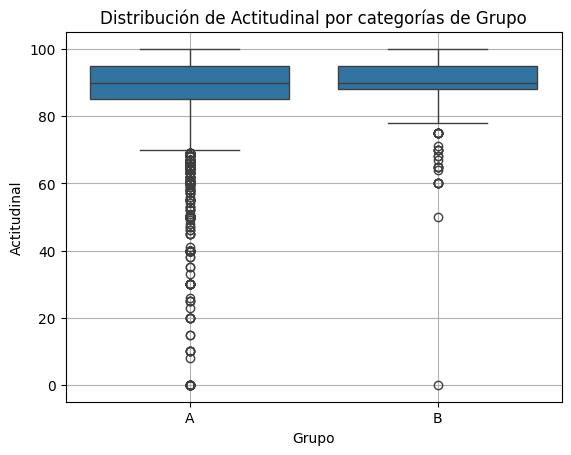

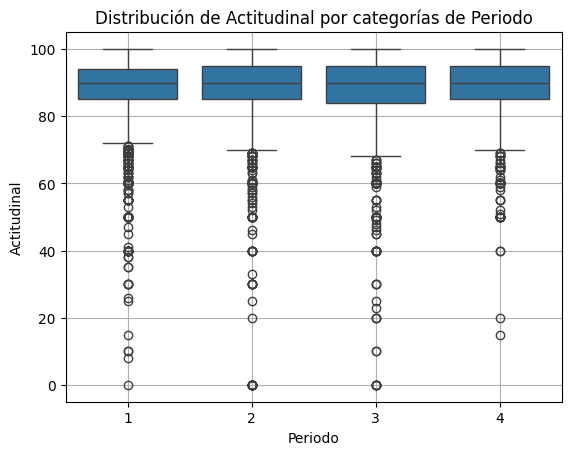

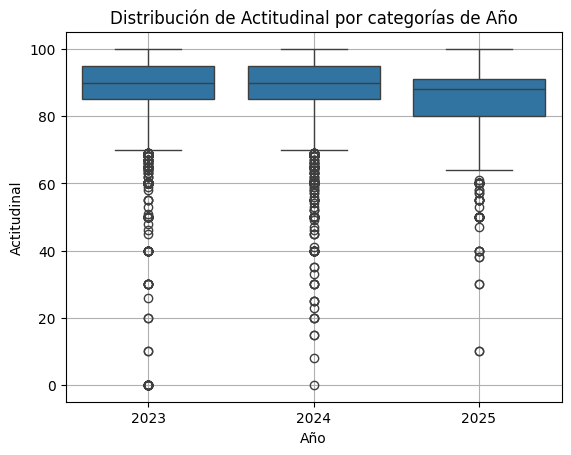

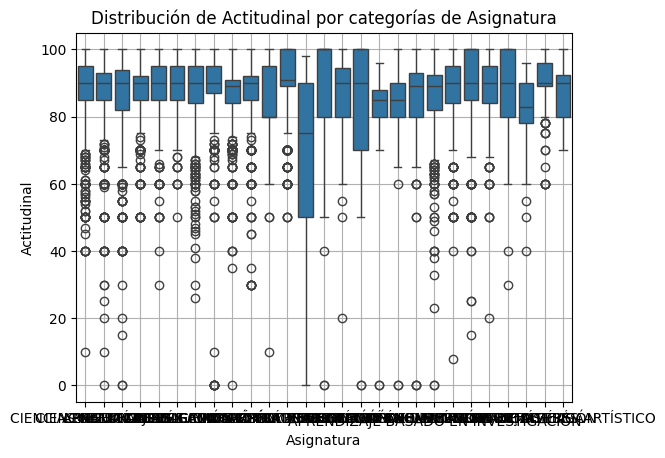

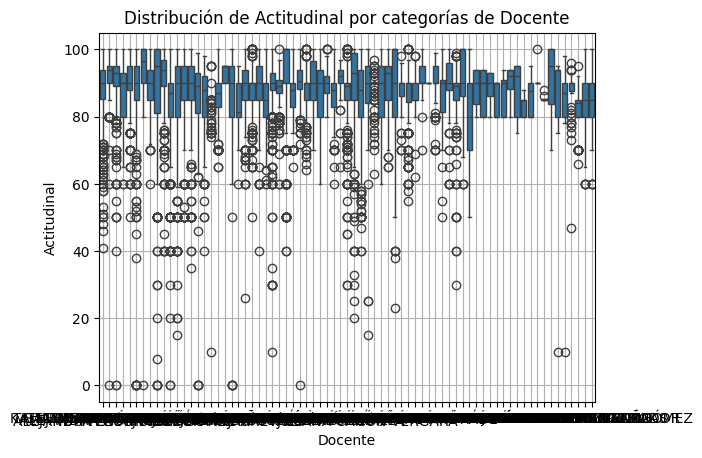

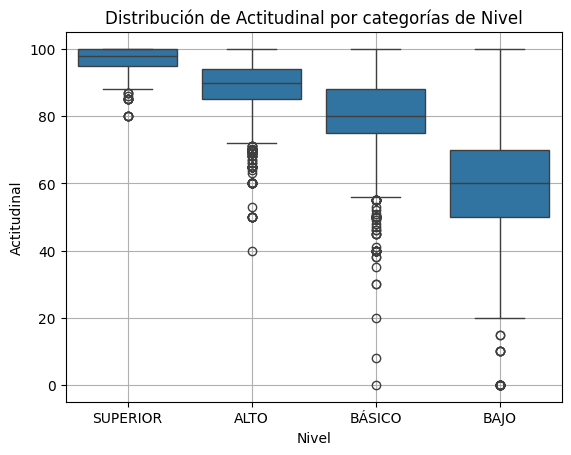

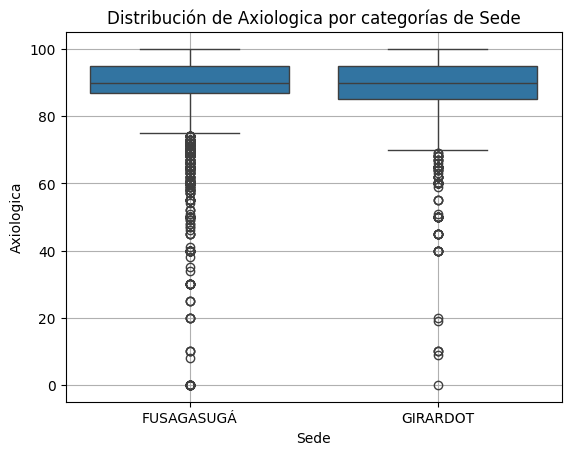

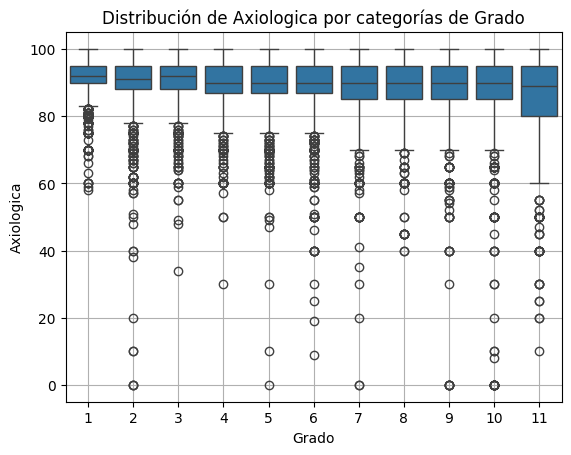

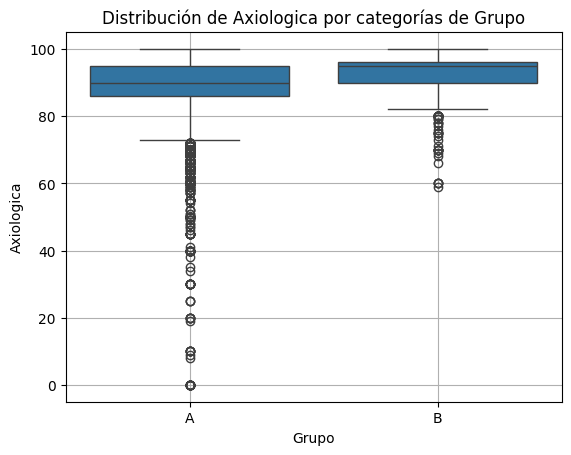

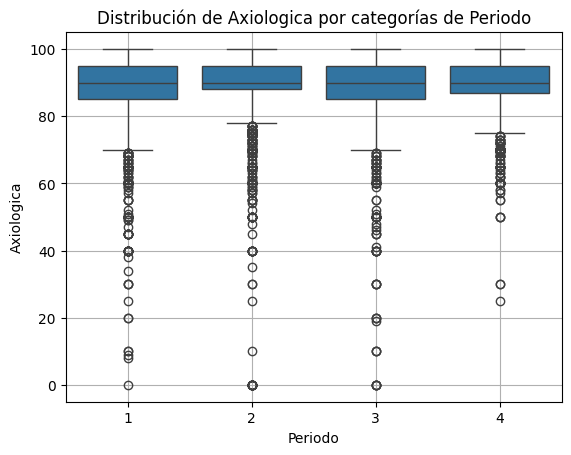

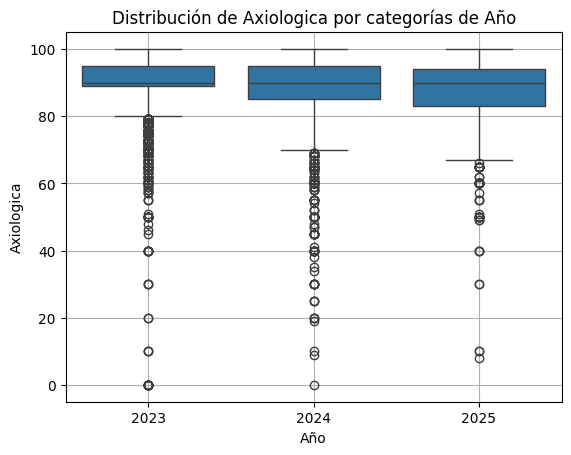

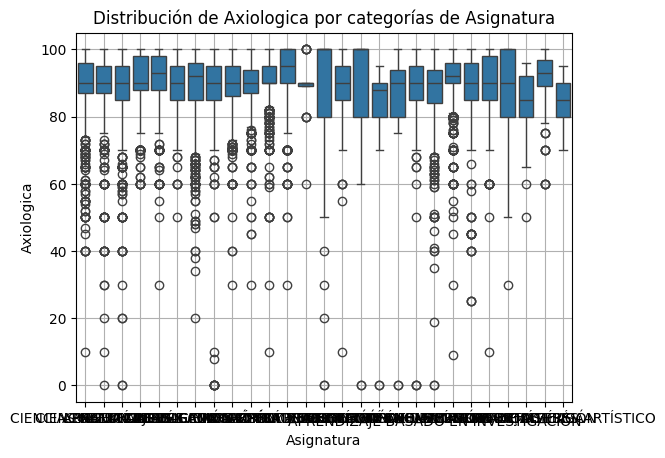

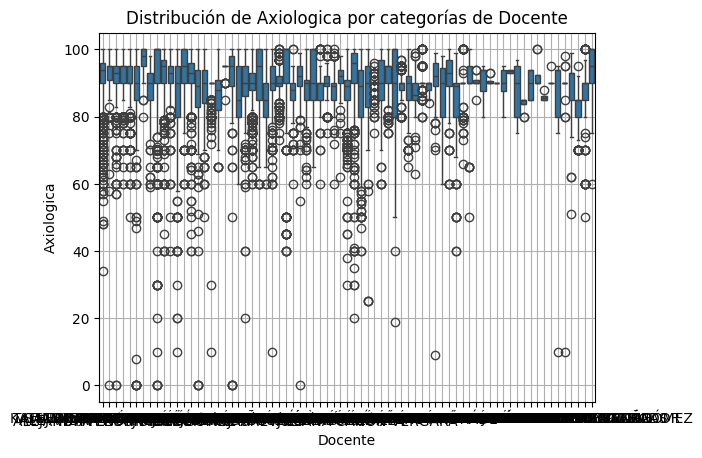

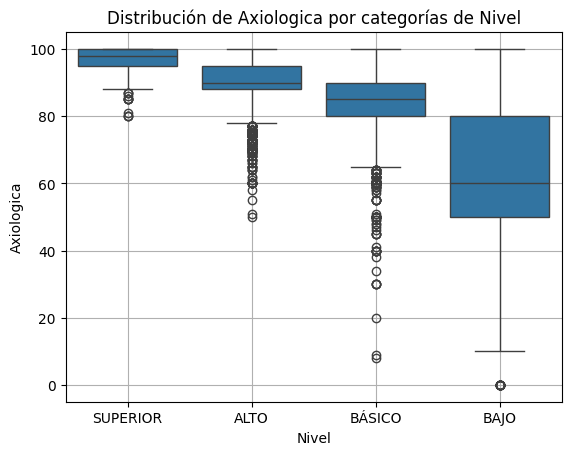

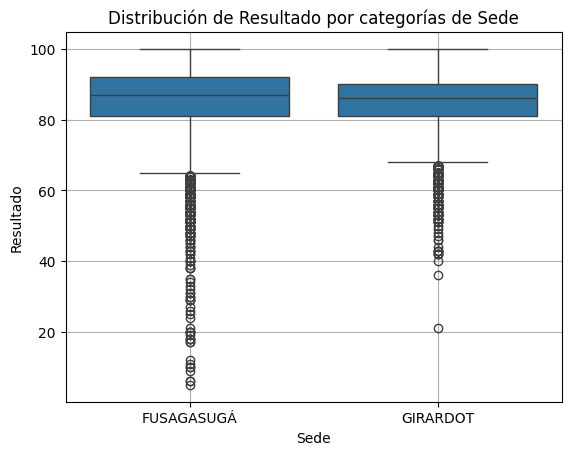

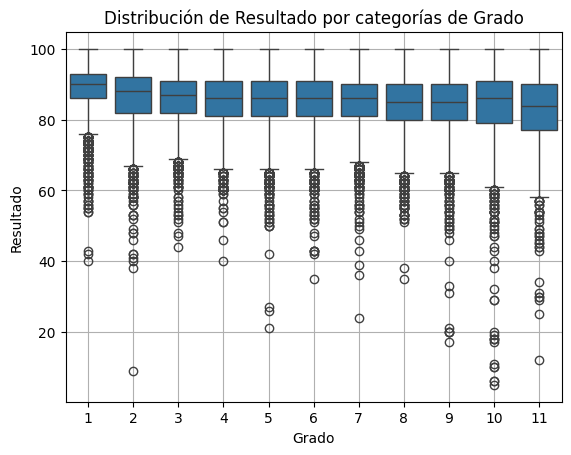

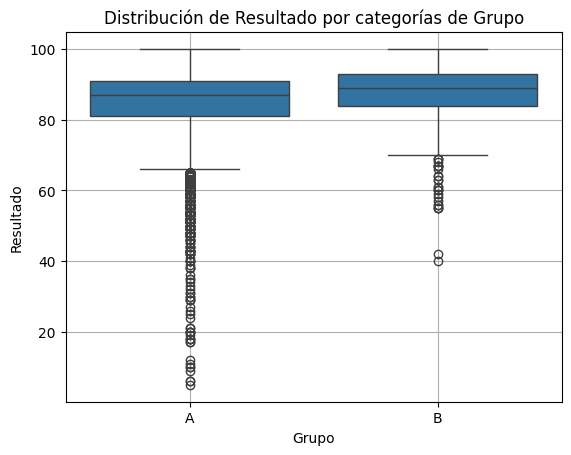

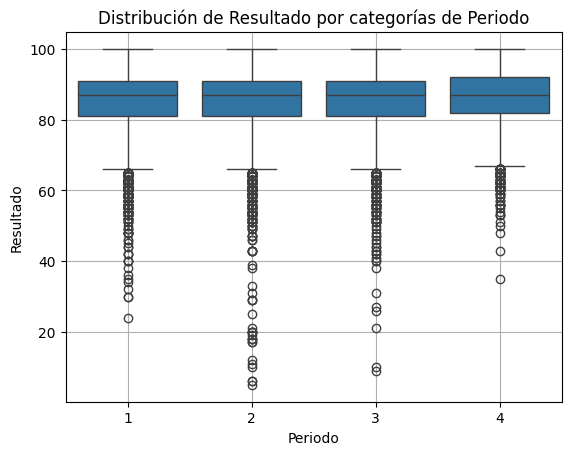

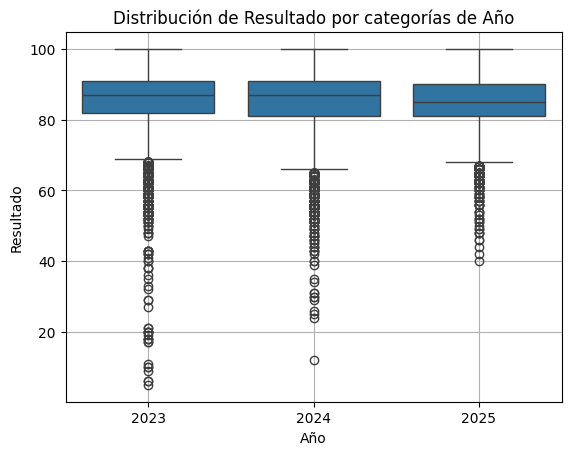

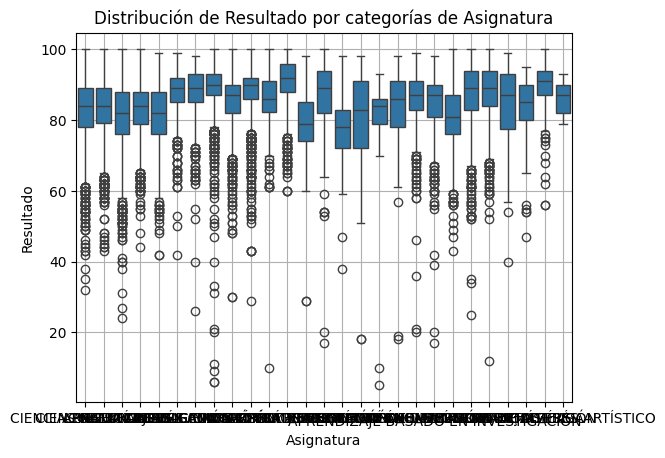

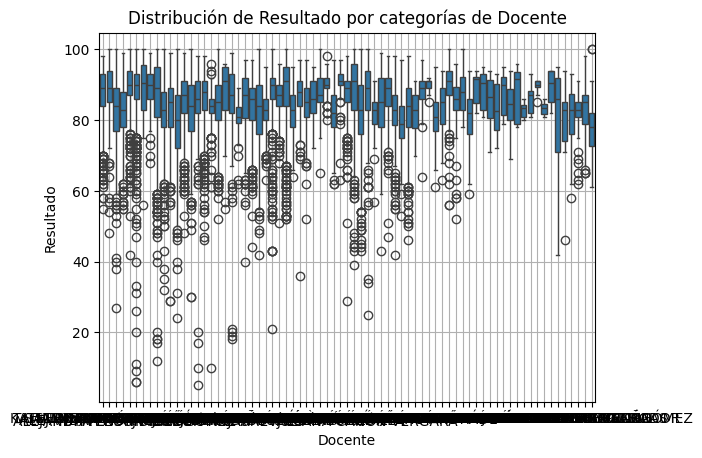

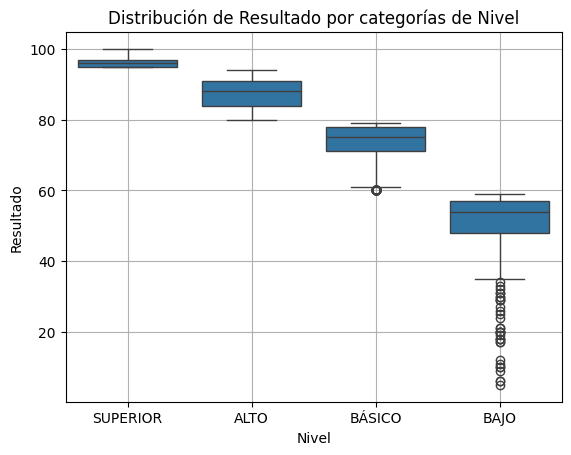

In [10]:
# Llamar a la función para variable categóricas y numéricas
categorical_cols.remove('Estudiante')
categorical_cols.remove('Identificacion')
for col in numeric_cols:
    for col2 in categorical_cols:
        # Llamar a la función para variable categóricas y numéricas
        eda_anova_bivariado_notes=eda.analisis_bivariado_num_cat( col, col2)
eda_anova_bivariado_notes.to_csv("../../data/processed/eda_anova_bivariado_notes.csv", index=False)

4. Análisis de Varianza (ANOVA)  
El siguiente análisis realiza pruebas de ANOVA entre todas las combinaciones de variables numéricas y categóricas en el dataset.

In [11]:
eda_anova_notes=eda.realizar_anova()
eda_anova_notes.to_csv("../../data/processed/eda_anova_notes.csv", index=False)

## 2.4. Reporte EDA automatico

In [12]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_limpio, title="Reporte EDA de Notas", explorative=True)
profile.to_file("../../data/processed/eda_reporte_notas.html")

C:\Users\Cathe\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Summarize dataset:  79%|███████▉  | 19/24 [00:01<00:00, 16.40it/s, Calculate auto correlation]  c:\Users\Cathe\.conda\envs\cloud_computing\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 58.93it/s]


## 2.5. Reporte Sweetviz

In [13]:
import sweetviz as sv

report = sv.analyze(df_limpio)
report.show_html("../../data/processed/sweetviz_reporte_notas.html")


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report ../../data/processed/sweetviz_reporte_notas.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
